<a href="https://colab.research.google.com/github/hsuanchengsun/Natural-Language-Processing/blob/main/Classification_Tasks_with_TF_IDF_GloVE_LIWC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Text Processing

In [ ]:
# Import useful modules

import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import numpy as np
import time 

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read review data from online folder

df_su = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/Status Updates.csv')

In [ ]:
# Show several lines

df_su.head()

,userid,message
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...


In [ ]:
print('Number of rows: ', len(df_su))

Number of rows:  3000


In [ ]:
df_su['message'][0]

'is still pissed that Eminem wasnt in the official Airplanes recording and mv.\tis chillin\' like a villain! "Livah." - omgpop Repomen ad.\tI thought about putting up a cartoon character as my profile picture, but then I realized that doing so would absolutely do nothing. At all.\tI sais shush girl. Shut\'cho lips, dooo the Helen Keller, and talk with yo hipz.\tI know too much Facebook is a bad thing, but skipping out on it for a week is suicide. Too much Starcraft 2 Beta. If you play, gimmeh your ign and lets roll.\tI just watched Grilled Cheesus and cried. A lot. Shit, why do I cry so easily...\ti got me a nu pic.\tis a white washed filipino and a weeaboo.\tI wore purple on accident.'

In [ ]:
# Test to see if there was any empty reviews in the dataset
df_su.isnull().values.any()

False

### Tokenization and normalization

In [ ]:
# Contraction expansion
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 7.2 MB/s 
     |████████████████████████████████| 287 kB 52.6 MB/s 


In [ ]:
# Define contraction funtion
def contraction_expansion(text):
  expanded_word = []    
  for word in text.split():
  # using contractions.fix to expand
    expanded_word.append(contractions.fix(word))   
   
  return  ' '.join(expanded_word)

In [ ]:
# There is no empty reviews, so we start to work on contraction 
df_su['message_expanded'] = df_su['message'].apply(contraction_expansion)
df_su.head()

,userid,message,message_expanded
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,is still pissed that Eminem was not in the off...
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,is singing today and is a little nurvous . ple...
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,I had a wonderful day at Anderson I am beat bu...
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,i like it on the floor! :) i hope you miss me....
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,is about to make some moolah! I need to start ...


In [ ]:
# tokenize each review in the dataframe
from nltk.tokenize import wordpunct_tokenize
%time df_su['message_token'] = df_su['message_expanded'].apply(wordpunct_tokenize)
df_su.head(3)

CPU times: user 475 ms, sys: 75.2 ms, total: 550 ms
Wall time: 580 ms


,userid,message,message_expanded,message_token
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,is still pissed that Eminem was not in the off...,"[is, still, pissed, that, Eminem, was, not, in..."
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo..."
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,I had a wonderful day at Anderson I am beat bu...,"[I, had, a, wonderful, day, at, Anderson, I, a..."


In [ ]:
# use pyspellchecker to list potential misspells
!pip install pyspellchecker

from spellchecker import SpellChecker
spell = SpellChecker()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.9 MB/s 


In [ ]:
# find those words that may be misspelled
%time df_su['Potential_misspells'] = df_su['message_token'].apply(spell.unknown)
df_su['Potential_misspells'].head(3)

CPU times: user 3.76 s, sys: 34.7 ms, total: 3.8 s
Wall time: 4.16 s


0    {dooo, mv, ..., starcraft, ign, hipz, chillin,...
1    {carlee, fannins, ison, ...., !!!!, ;), :(, .....
2                             {..., !", ms, thru, 1st}
Name: Potential_misspells, dtype: object

In [ ]:
# import POS libiaries
import nltk
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# create POS tag
%time df_su['message_tagged'] = df_su['message_token'].apply(nltk.pos_tag)
df_su.head(3)

CPU times: user 1min 25s, sys: 666 ms, total: 1min 25s
Wall time: 1min 34s


,userid,message,message_expanded,message_token,Potential_misspells,message_tagged
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,is still pissed that Eminem was not in the off...,"[is, still, pissed, that, Eminem, was, not, in...","{dooo, mv, ..., starcraft, ign, hipz, chillin,...","[(is, VBZ), (still, RB), (pissed, VBN), (that,..."
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...","{carlee, fannins, ison, ...., !!!!, ;), :(, .....","[(is, VBZ), (singing, VBG), (today, NN), (and,..."
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,I had a wonderful day at Anderson I am beat bu...,"[I, had, a, wonderful, day, at, Anderson, I, a...","{..., !"", ms, thru, 1st}","[(I, PRP), (had, VBD), (a, DT), (wonderful, JJ..."


In [ ]:
# create a function to lemmatize words based on different POS tag types; 
def lemmatize_POS (tagged_columns):
  wnl = WordNetLemmatizer()
  text=[]
  for word, tag in tagged_columns:
    if tag.startswith('NN'):
      token = wnl.lemmatize(word, pos='n') # n is NOUN 
    elif tag.startswith('VB'):
      token = wnl.lemmatize(word, pos='v') # v is VERB
    elif tag.startswith('JJ'):
      token = wnl.lemmatize(word, pos='a') # a is ADJ
    elif tag.startswith('RB'):
      token = wnl.lemmatize(word, pos='r') # r is ADV
    else:
      token = word
    text.append(token)
  #cleaned_corpus.append(text)
  return text

In [ ]:
# lemmatization
%time df_su['message_lemmas'] = df_su['message_tagged'].apply(lemmatize_POS)
df_su['message_lemmas'].head(3)

CPU times: user 10.8 s, sys: 197 ms, total: 11 s
Wall time: 15 s


0    [be, still, piss, that, Eminem, be, not, in, t...
1    [be, sing, today, and, be, a, little, nurvous,...
2    [I, have, a, wonderful, day, at, Anderson, I, ...
Name: message_lemmas, dtype: object

In [ ]:
# Define preprocessing function
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation

def preprocessing(tokens):
  tokens = [token.lower() for token in tokens] # lowercasing
  
  tokens = [token for token in tokens if not token.isdigit()] # remove digit

  tokens = [token for token in tokens if token not in punctuation] # remove punctuations

  mystopwords = set(stopwords.words("english")) 
  tokens = [token for token in tokens if token not in mystopwords] # remove stopwords
  
  tokens = [word for word in tokens if len(word)>=3] # remove words with one or two characters

  return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# now let's apply text normalization
%time df_su['message_norm'] = df_su['message_lemmas'].apply(preprocessing)
df_su['message_norm'].head(3)

CPU times: user 1.59 s, sys: 141 ms, total: 1.73 s
Wall time: 2.23 s


0    [still, piss, eminem, official, airplanes, rec...
1    [sing, today, little, nurvous, please, pray, s...
2    [wonderful, day, anderson, beat, good, beat, i...
Name: message_norm, dtype: object

In [ ]:
# create a text column with tagged tokens
%time df_su['cleaned_message'] = df_su['message_norm'].apply(lambda row: ' '.join(str(x) for x in row))
df_su.head()

CPU times: user 148 ms, sys: 3.99 ms, total: 152 ms
Wall time: 153 ms


,userid,message,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,is still pissed that Eminem was not in the off...,"[is, still, pissed, that, Eminem, was, not, in...","{dooo, mv, ..., starcraft, ign, hipz, chillin,...","[(is, VBZ), (still, RB), (pissed, VBN), (that,...","[be, still, piss, that, Eminem, be, not, in, t...","[still, piss, eminem, official, airplanes, rec...",still piss eminem official airplanes recording...
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...","{carlee, fannins, ison, ...., !!!!, ;), :(, .....","[(is, VBZ), (singing, VBG), (today, NN), (and,...","[be, sing, today, and, be, a, little, nurvous,...","[sing, today, little, nurvous, please, pray, s...",sing today little nurvous please pray send tho...
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,I had a wonderful day at Anderson I am beat bu...,"[I, had, a, wonderful, day, at, Anderson, I, a...","{..., !"", ms, thru, 1st}","[(I, PRP), (had, VBD), (a, DT), (wonderful, JJ...","[I, have, a, wonderful, day, at, Anderson, I, ...","[wonderful, day, anderson, beat, good, beat, i...",wonderful day anderson beat good beat importan...
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,i like it on the floor! :) i hope you miss me....,"[i, like, it, on, the, floor, !, :), i, hope, ...","{..., :), !!!!!!, :(, p, boyslikegirls3, .., s...","[(i, NN), (like, IN), (it, PRP), (on, IN), (th...","[i, like, it, on, the, floor, !, :), i, hope, ...","[like, floor, hope, miss, little, bit, maybe, ...",like floor hope miss little bit maybe reason c...
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,is about to make some moolah! I need to start ...,"[is, about, to, make, some, moolah, !, I, need...","{..., ch, mp, !!!!!, .., ...., …, vergara, !!!...","[(is, VBZ), (about, IN), (to, TO), (make, VB),...","[be, about, to, make, some, moolah, !, I, need...","[make, moolah, need, start, play, mafia, wars,...",make moolah need start play mafia wars love da...


In [ ]:
# Test to see if there was any empty reviews in the dataset
df_su['cleaned_message'].isnull().values.any()

False

### Information of all status update messages

In [ ]:
# Calculate original message length
df_su['Message_Length'] = df_su['message_token'].apply(len)
df_su.head()

,userid,message,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message,Message_Length
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,is still pissed that Eminem was not in the off...,"[is, still, pissed, that, Eminem, was, not, in...","{dooo, mv, ..., starcraft, ign, hipz, chillin,...","[(is, VBZ), (still, RB), (pissed, VBN), (that,...","[be, still, piss, that, Eminem, be, not, in, t...","[still, piss, eminem, official, airplanes, rec...",still piss eminem official airplanes recording...,160
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...","{carlee, fannins, ison, ...., !!!!, ;), :(, .....","[(is, VBZ), (singing, VBG), (today, NN), (and,...","[be, sing, today, and, be, a, little, nurvous,...","[sing, today, little, nurvous, please, pray, s...",sing today little nurvous please pray send tho...,2423
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,I had a wonderful day at Anderson I am beat bu...,"[I, had, a, wonderful, day, at, Anderson, I, a...","{..., !"", ms, thru, 1st}","[(I, PRP), (had, VBD), (a, DT), (wonderful, JJ...","[I, have, a, wonderful, day, at, Anderson, I, ...","[wonderful, day, anderson, beat, good, beat, i...",wonderful day anderson beat good beat importan...,672
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,i like it on the floor! :) i hope you miss me....,"[i, like, it, on, the, floor, !, :), i, hope, ...","{..., :), !!!!!!, :(, p, boyslikegirls3, .., s...","[(i, NN), (like, IN), (it, PRP), (on, IN), (th...","[i, like, it, on, the, floor, !, :), i, hope, ...","[like, floor, hope, miss, little, bit, maybe, ...",like floor hope miss little bit maybe reason c...,669
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,is about to make some moolah! I need to start ...,"[is, about, to, make, some, moolah, !, I, need...","{..., ch, mp, !!!!!, .., ...., …, vergara, !!!...","[(is, VBZ), (about, IN), (to, TO), (make, VB),...","[be, about, to, make, some, moolah, !, I, need...","[make, moolah, need, start, play, mafia, wars,...",make moolah need start play mafia wars love da...,1439


In [ ]:
# Calculate cleaned message length
df_su['Cleaned_Message_Length'] = df_su['message_norm'].apply(len)
df_su.head()

,userid,message,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message,Message_Length,Cleaned_Message_Length
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,is still pissed that Eminem was not in the off...,"[is, still, pissed, that, Eminem, was, not, in...","{dooo, mv, ..., starcraft, ign, hipz, chillin,...","[(is, VBZ), (still, RB), (pissed, VBN), (that,...","[be, still, piss, that, Eminem, be, not, in, t...","[still, piss, eminem, official, airplanes, rec...",still piss eminem official airplanes recording...,160,67
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...","{carlee, fannins, ison, ...., !!!!, ;), :(, .....","[(is, VBZ), (singing, VBG), (today, NN), (and,...","[be, sing, today, and, be, a, little, nurvous,...","[sing, today, little, nurvous, please, pray, s...",sing today little nurvous please pray send tho...,2423,1081
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,I had a wonderful day at Anderson I am beat bu...,"[I, had, a, wonderful, day, at, Anderson, I, a...","{..., !"", ms, thru, 1st}","[(I, PRP), (had, VBD), (a, DT), (wonderful, JJ...","[I, have, a, wonderful, day, at, Anderson, I, ...","[wonderful, day, anderson, beat, good, beat, i...",wonderful day anderson beat good beat importan...,672,279
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,i like it on the floor! :) i hope you miss me....,"[i, like, it, on, the, floor, !, :), i, hope, ...","{..., :), !!!!!!, :(, p, boyslikegirls3, .., s...","[(i, NN), (like, IN), (it, PRP), (on, IN), (th...","[i, like, it, on, the, floor, !, :), i, hope, ...","[like, floor, hope, miss, little, bit, maybe, ...",like floor hope miss little bit maybe reason c...,669,272
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,is about to make some moolah! I need to start ...,"[is, about, to, make, some, moolah, !, I, need...","{..., ch, mp, !!!!!, .., ...., …, vergara, !!!...","[(is, VBZ), (about, IN), (to, TO), (make, VB),...","[be, about, to, make, some, moolah, !, I, need...","[make, moolah, need, start, play, mafia, wars,...",make moolah need start play mafia wars love da...,1439,610


In [ ]:
# lexical diversity is the total number of tokens over unique tokens
def lexical_diversity(text):
    """
    A measure of the lexical richness of the text
    """
    return len(text)/len(set(text))

In [ ]:
# Calculate lexical diversity
%time df_su['Lexical_Diversity'] = df_su['message_norm'].apply(lexical_diversity)
df_su['Lexical_Diversity']

CPU times: user 49.8 ms, sys: 0 ns, total: 49.8 ms
Wall time: 52.9 ms


0       1.030769
1       2.188259
2       1.516304
3       1.478261
4       1.564103
          ...   
2995    1.310734
2996    1.346939
2997    1.534722
2998    1.797980
2999    1.471910
Name: Lexical_Diversity, Length: 3000, dtype: float64

In [ ]:
# Count # of Potential misspells
%time df_su['Count_Potential_Misspells'] = df_su['Potential_misspells'].apply(len)
df_su.head()

CPU times: user 5.92 ms, sys: 0 ns, total: 5.92 ms
Wall time: 6.04 ms


,userid,message,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message,Message_Length,Cleaned_Message_Length,Lexical_Diversity,Count_Potential_Misspells
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,is still pissed that Eminem was not in the off...,"[is, still, pissed, that, Eminem, was, not, in...","{dooo, mv, ..., starcraft, ign, hipz, chillin,...","[(is, VBZ), (still, RB), (pissed, VBN), (that,...","[be, still, piss, that, Eminem, be, not, in, t...","[still, piss, eminem, official, airplanes, rec...",still piss eminem official airplanes recording...,160,67,1.030769,15
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...","{carlee, fannins, ison, ...., !!!!, ;), :(, .....","[(is, VBZ), (singing, VBG), (today, NN), (and,...","[be, sing, today, and, be, a, little, nurvous,...","[sing, today, little, nurvous, please, pray, s...",sing today little nurvous please pray send tho...,2423,1081,2.188259,80
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,I had a wonderful day at Anderson I am beat bu...,"[I, had, a, wonderful, day, at, Anderson, I, a...","{..., !"", ms, thru, 1st}","[(I, PRP), (had, VBD), (a, DT), (wonderful, JJ...","[I, have, a, wonderful, day, at, Anderson, I, ...","[wonderful, day, anderson, beat, good, beat, i...",wonderful day anderson beat good beat importan...,672,279,1.516304,5
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,i like it on the floor! :) i hope you miss me....,"[i, like, it, on, the, floor, !, :), i, hope, ...","{..., :), !!!!!!, :(, p, boyslikegirls3, .., s...","[(i, NN), (like, IN), (it, PRP), (on, IN), (th...","[i, like, it, on, the, floor, !, :), i, hope, ...","[like, floor, hope, miss, little, bit, maybe, ...",like floor hope miss little bit maybe reason c...,669,272,1.478261,18
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,is about to make some moolah! I need to start ...,"[is, about, to, make, some, moolah, !, I, need...","{..., ch, mp, !!!!!, .., ...., …, vergara, !!!...","[(is, VBZ), (about, IN), (to, TO), (make, VB),...","[be, about, to, make, some, moolah, !, I, need...","[make, moolah, need, start, play, mafia, wars,...",make moolah need start play mafia wars love da...,1439,610,1.564103,37


| Status update messages  |  Message Length |  Cleaned Message Length |  Lexical Diversity | Count # of Potential misspells|
|---|---|---|---|---|
|1|160	|67	|1.030769	|15|
|2|2423	|1081	|2.188259	|80|
|3|672	|279	|1.516304	|5|
|4|669	|272	|1.478261	|18|
|5|1439	|610	|1.564103	|37|

## Part 2: Feature engineering

### TF-IDF vectors as features

In [ ]:
# create our list of lists corpus (a list of lists of tokens) 
reviews = df_su['cleaned_message'].tolist()

reviews[0]

'still piss eminem official airplanes recording chillin like villain livah omgpop repomen think put cartoon character profile picture realize would absolutely nothing sais shush girl shut cho lip dooo helen keller talk hipz know much facebook bad thing skip week suicide much starcraft beta play gimmeh ign let roll watch grilled cheesus cry lot shit cry easily ... get pic white wash filipino weeaboo wear purple accident'

In [ ]:
# included words used by at least 1% of the documents as features
print("The number of reviews:", len(reviews))
print("1% of the documents: ", round(len(reviews) * 0.01))

The number of reviews: 3000
1% of the documents:  30


In [ ]:
# create our list of lists corpus (a list of lists of tokens) 
import gensim
from gensim import corpora

corpus = [str(doc).split() for doc in reviews]

print(*corpus[0])

still piss eminem official airplanes recording chillin like villain livah omgpop repomen think put cartoon character profile picture realize would absolutely nothing sais shush girl shut cho lip dooo helen keller talk hipz know much facebook bad thing skip week suicide much starcraft beta play gimmeh ign let roll watch grilled cheesus cry lot shit cry easily ... get pic white wash filipino weeaboo wear purple accident


In [ ]:
# create a dictionary of tokens
dictionary = gensim.corpora.Dictionary(corpus)

In [ ]:
# create a token list with a minimal document frequency count (number of documents which a token occurs)
token_list =[]
for token_id, count in dictionary.dfs.items(): # .dfs returns doctument frequecy based on token id (int)
  if count > 30:
    token_list.append(dictionary.get(token_id)) #.get() retrieve the actual tokens based on id

print(len(token_list))
print(token_list[:3]) # see the list of tokens 

2026
['still', 'piss', 'official']


In [ ]:
# create a tfidf with from a term list 
from nltk.text import TextCollection

def tf_idf_nltk_wordlist(corpus, term_list):
# tokenization
  tokenized_corpus = [doc.split() for doc in corpus]

  texts = TextCollection(tokenized_corpus)
  tf_idf = dict()

  for i, doc in enumerate(tokenized_corpus):
    tf_idf_score = dict()

    doc_num = 'doc_' + str(i+1)
    
    for term in doc:
      if term in term_list:
        tf_idf_score[term] = texts.tf_idf(term, doc)
    
    tf_idf[doc_num] = tf_idf_score
  
  return tf_idf

In [ ]:
# Create TF-IDF matrix
%time tf_idf = tf_idf_nltk_wordlist(reviews, token_list)

CPU times: user 45.4 s, sys: 234 ms, total: 45.6 s
Wall time: 48.7 s


In [ ]:
#let's check the new  dictionary item
list(tf_idf.items())[0]

('doc_1',
 {'still': 0.01561223639625282,
  'piss': 0.04079653744905224,
  'official': 0.0630175811004774,
  'chillin': 0.056302403926163994,
  'like': 0.005473511638690057,
  'think': 0.006801586933506136,
  'put': 0.021114833367784903,
  'cartoon': 0.06601266610737518,
  'character': 0.05742514155657574,
  'profile': 0.04431962634681519,
  'picture': 0.03294440168939882,
  'realize': 0.02945196038584247,
  'would': 0.011557570686350575,
  'absolutely': 0.0445147320418503,
  'nothing': 0.025320138648115373,
  'girl': 0.023848339949115647,
  'shut': 0.04816782200804055,
  'lip': 0.05766019166057782,
  'talk': 0.024021461379613435,
  'know': 0.007533329996519901,
  'much': 0.026014230330876492,
  'facebook': 0.02360445587678894,
  'bad': 0.0186309412421271,
  'thing': 0.013713341225257815,
  'skip': 0.06141115327671074,
  'week': 0.020163092795262676,
  'play': 0.0213833940401433,
  'let': 0.01946876420369711,
  'roll': 0.04199120472776174,
  'watch': 0.01691348855877207,
  'cry': 0.063

In [ ]:
# Using dataframe to show the TF-IDF matrix
tf_idf_df_su = pd.DataFrame.from_dict(tf_idf).T.reset_index().reset_index()

tf_idf_df_su = tf_idf_df_su.rename (columns={'level_0': 'messageID'}).drop(['index'], axis =1)

tf_idf_df_su.head(5)

,messageID,still,piss,official,chillin,like,think,put,cartoon,character,profile,picture,realize,would,absolutely,nothing,girl,shut,lip,talk,know,much,facebook,bad,thing,skip,week,play,let,roll,watch,cry,lot,shit,easily,...,get,pic,white,wash,wear,purple,accident,sing,today,little,please,pray,send,thought,prayer,dear,friend,long,lose,husband,due,heart,issue,keep,three,beautiful,kid,break,want,thank,lord,everytime,hear,always,come,along,make,shout,ask,everyone,say,joy,need,special,touch,try,new,ready,going,fun,girls,day,love,bed,hope,merry,christmas,remember,thanks,god,son,excited,dad,town,never,see,blessing,yay,favorite,movie,first,club,second,everything,back,excite,church,morning,home,enjoy,tree,lol,already,ride,rid,faith,world,set,free,hang,hair,help,....,walmart,crazy,sleep,working,soooo,tire,good,thankful,family,graduation,eat,jack,sarah,dinner,hehehe,shopping,christ,happy,work,store,life,laugh,florida,tell,snow,sat,sun,funny,window,open,door,haha,blanket,warm,mom,birthday,!!!!,also,spending,well,finger,paint,really,school,christian,........,people,call,may,bring,close,one,way,relax,pretty,sure,could,turn,teen,house,trust,glad,okay,sweet,dream,years,eve,band,practice,tomorrow,camp,nail,buy,cute,flip,miss,sorry,cannot,text,yet,live,.......,babysitting,amazing,plan,answer,right,find,time,tonight,blessed,weekend,shop,something,looking,forward,david,row,wonderful,lead,direction,feeling,together,lovin,take,food,tea,sad,able,start,spring,happen,reason,save,money,place,anyone,...?,kind,upset,although,many,great,include,team,wake,wife,"""...",cool,brother,sister,law,sense,wonder,fill,single,breath,grant,ever,leave,empty,hand,feel,small,stand,beside,ocean,whenever,promise,give,chance,choice,sit,dance,sunshine,smile,face,real,wait,letter,cross,youth,sunday,blue,bank,game,music,word,course,message,pack,next,:)),look,song,wedding,saturday,another,fair,move,!!!!!!!,jesus,!!!,wish,best,!!!!!!,catch,rest,head,night,katie,vote,last,someone,sick,yes,room,spell,two,chair,rather,large,brick,flat,rock,use,flower,skill,around,believe,happens,change,learn,sometimes,fall,apart,awake,spend,grass,stop,high,angel,south,afford,strength,rough,hole,basketball,peep,fire,yellow,shine,light,soft,quite,calm,glass,sea,finish,grace,super,concert,soon,mean,since,friends,beat,important,everyday,student,especially,hood,year,ago,bless,cut,man,actually,fell,thru,hell,continue,grow,lucky,choose,even,blood,every,frame,clean,run,across,box,precious,experience,jay,ball,job,interview,class,whole,month,push,teach,seem,child,write,lesson,till,monday,goodbye,throat,tear,eye,saw,felt,request,book,old,big,hard,state,safe,street,fear,hate,red,neck,might,person,perfect,body,1st,pretend,else,proud,post,status,hot,cold,drink,partner,care,floor,bit,maybe,win,fail,confuse,fuck,bullshit,freak,pump,wall,friday,somebody,far,enough,guess,without,everybody,involve,pressure,kitty,cheese,brown,name,hannah,computer,starbucks,eventually,party,hold,part,shot,lost,cause,dark,horse,blame,pain,soo,drama,completely,view,hilarious,damn,shall,mine,stupid,...,recommend,unless,!!!!!!!!!!!!!,awful,farmville,cafe,dress,makeup,found,leg,broke,myspace,gaga,album,january,butterfly,mommy,lots,dvd,chris,dirt,university,seven,gum,festival,3rd,bus,fat,freaking,taco,machine,edge,speak,pop,pet,tan,ashamed,weight,tight,tall,pink,obviously,likely,obsess,trash,fashion,log,lab,guys,social,quiet,soul,asshole,july,doubt,hahaha,gym,spin,dude,brand,momma,teeth,bug,follow,link,:-),sometime,boo,passion,risk,lyric,clue,bee,pumpkin,share,bubble,rice,butter,argue,zoo,michael,fool,piano,boat,photo,scott,art,load,jacket,broken,reality,coming,crew,soldier,killer,imagine,several,marry,lunch,pot,normal,wed,mac,review,fee,hotel,quote,tongue,decent,rule,order,contemplate,rainbow,sadness,done,puzzle,enter,august,marathon,suffer,horror,breathe,cooky,plane,therefore,smart,slide,freeze,third,tour,title,google,campus,offically,tonite,lookin,2day,government,bedroom,devil,worker,main,cheer,leaf,welcome,universe,aka,duty,pool,pair,lif

In [ ]:
# replace NA with 0

tf_idf_df_su = tf_idf_df_su.fillna(0)

tf_idf_df_su.head(5)

,messageID,still,piss,official,chillin,like,think,put,cartoon,character,profile,picture,realize,would,absolutely,nothing,girl,shut,lip,talk,know,much,facebook,bad,thing,skip,week,play,let,roll,watch,cry,lot,shit,easily,...,get,pic,white,wash,wear,purple,accident,sing,today,little,please,pray,send,thought,prayer,dear,friend,long,lose,husband,due,heart,issue,keep,three,beautiful,kid,break,want,thank,lord,everytime,hear,always,come,along,make,shout,ask,everyone,say,joy,need,special,touch,try,new,ready,going,fun,girls,day,love,bed,hope,merry,christmas,remember,thanks,god,son,excited,dad,town,never,see,blessing,yay,favorite,movie,first,club,second,everything,back,excite,church,morning,home,enjoy,tree,lol,already,ride,rid,faith,world,set,free,hang,hair,help,....,walmart,crazy,sleep,working,soooo,tire,good,thankful,family,graduation,eat,jack,sarah,dinner,hehehe,shopping,christ,happy,work,store,life,laugh,florida,tell,snow,sat,sun,funny,window,open,door,haha,blanket,warm,mom,birthday,!!!!,also,spending,well,finger,paint,really,school,christian,........,people,call,may,bring,close,one,way,relax,pretty,sure,could,turn,teen,house,trust,glad,okay,sweet,dream,years,eve,band,practice,tomorrow,camp,nail,buy,cute,flip,miss,sorry,cannot,text,yet,live,.......,babysitting,amazing,plan,answer,right,find,time,tonight,blessed,weekend,shop,something,looking,forward,david,row,wonderful,lead,direction,feeling,together,lovin,take,food,tea,sad,able,start,spring,happen,reason,save,money,place,anyone,...?,kind,upset,although,many,great,include,team,wake,wife,"""...",cool,brother,sister,law,sense,wonder,fill,single,breath,grant,ever,leave,empty,hand,feel,small,stand,beside,ocean,whenever,promise,give,chance,choice,sit,dance,sunshine,smile,face,real,wait,letter,cross,youth,sunday,blue,bank,game,music,word,course,message,pack,next,:)),look,song,wedding,saturday,another,fair,move,!!!!!!!,jesus,!!!,wish,best,!!!!!!,catch,rest,head,night,katie,vote,last,someone,sick,yes,room,spell,two,chair,rather,large,brick,flat,rock,use,flower,skill,around,believe,happens,change,learn,sometimes,fall,apart,awake,spend,grass,stop,high,angel,south,afford,strength,rough,hole,basketball,peep,fire,yellow,shine,light,soft,quite,calm,glass,sea,finish,grace,super,concert,soon,mean,since,friends,beat,important,everyday,student,especially,hood,year,ago,bless,cut,man,actually,fell,thru,hell,continue,grow,lucky,choose,even,blood,every,frame,clean,run,across,box,precious,experience,jay,ball,job,interview,class,whole,month,push,teach,seem,child,write,lesson,till,monday,goodbye,throat,tear,eye,saw,felt,request,book,old,big,hard,state,safe,street,fear,hate,red,neck,might,person,perfect,body,1st,pretend,else,proud,post,status,hot,cold,drink,partner,care,floor,bit,maybe,win,fail,confuse,fuck,bullshit,freak,pump,wall,friday,somebody,far,enough,guess,without,everybody,involve,pressure,kitty,cheese,brown,name,hannah,computer,starbucks,eventually,party,hold,part,shot,lost,cause,dark,horse,blame,pain,soo,drama,completely,view,hilarious,damn,shall,mine,stupid,...,recommend,unless,!!!!!!!!!!!!!,awful,farmville,cafe,dress,makeup,found,leg,broke,myspace,gaga,album,january,butterfly,mommy,lots,dvd,chris,dirt,university,seven,gum,festival,3rd,bus,fat,freaking,taco,machine,edge,speak,pop,pet,tan,ashamed,weight,tight,tall,pink,obviously,likely,obsess,trash,fashion,log,lab,guys,social,quiet,soul,asshole,july,doubt,hahaha,gym,spin,dude,brand,momma,teeth,bug,follow,link,:-),sometime,boo,passion,risk,lyric,clue,bee,pumpkin,share,bubble,rice,butter,argue,zoo,michael,fool,piano,boat,photo,scott,art,load,jacket,broken,reality,coming,crew,soldier,killer,imagine,several,marry,lunch,pot,normal,wed,mac,review,fee,hotel,quote,tongue,decent,rule,order,contemplate,rainbow,sadness,done,puzzle,enter,august,marathon,suffer,horror,breathe,cooky,plane,therefore,smart,slide,freeze,third,tour,title,google,campus,offically,tonite,lookin,2day,government,bedroom,devil,worker,main,cheer,leaf,welcome,universe,aka,duty,pool,pair,lif

In [ ]:
# merge join with the original dataset
message_tf_idf = pd.merge(left=df_su, right=tf_idf_df_su, left_on=df_su.index, right_on='messageID')
message_tf_idf.head(3)

,userid,message_x,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message,Message_Length,Cleaned_Message_Length,Lexical_Diversity,Count_Potential_Misspells,messageID,still,piss,official,chillin,like,think,put,cartoon,character,profile,picture,realize,would,absolutely,nothing,girl,shut,lip,talk,know,much,facebook,bad,thing,skip,week,play,let,roll,watch,cry,lot,shit,easily,...,get,pic,white,wash,wear,purple,accident,sing,today,little,please,pray,send,thought,prayer,dear,friend,long,lose,husband,due,heart,issue,keep,three,beautiful,kid,break,want,thank,lord,everytime,hear,always,come,along,make,shout,ask,everyone,say,joy,need,special,touch,try,new,ready,going,fun,girls,day,love,bed,hope,merry,christmas,remember,thanks,god,son,excited,dad,town,never,see,blessing,yay,favorite,movie,first,club,second,everything,back,excite,church,morning,home,enjoy,tree,lol,already,ride,rid,faith,world,set,free,hang,hair,help,....,walmart,crazy,sleep,working,soooo,tire,good,thankful,family,graduation,eat,jack,sarah,dinner,hehehe,shopping,christ,happy,work,store,life,laugh,florida,tell,snow,sat,sun,funny,window,open,door,haha,blanket,warm,mom,birthday,!!!!,also,spending,well,finger,paint,really,school,christian,........,people,call,may,bring,close,one,way,relax,pretty,sure,could,turn,teen,house,trust,glad,okay,sweet,dream,years,eve,band,practice,tomorrow,camp,nail,buy,cute,flip,miss,sorry,cannot,text,yet,live,.......,babysitting,amazing,plan,answer,right,find,time,tonight,blessed,weekend,shop,something,looking,forward,david,row,wonderful,lead,direction,feeling,together,lovin,take,food,tea,sad,able,start,spring,happen,reason,save,money,place,anyone,...?,kind,upset,although,many,great,include,team,wake,wife,"""...",cool,brother,sister,law,sense,wonder,fill,single,breath,grant,ever,leave,empty,hand,feel,small,stand,beside,ocean,whenever,promise,give,chance,choice,sit,dance,sunshine,smile,face,real,wait,letter,cross,youth,sunday,blue,bank,game,music,word,course,message_y,pack,next,:)),look,song,wedding,saturday,another,fair,move,!!!!!!!,jesus,!!!,wish,best,!!!!!!,catch,rest,head,night,katie,vote,last,someone,sick,yes,room,spell,two,chair,rather,large,brick,flat,rock,use,flower,skill,around,believe,happens,change,learn,sometimes,fall,apart,awake,spend,grass,stop,high,angel,south,afford,strength,rough,hole,basketball,peep,fire,yellow,shine,light,soft,quite,calm,glass,sea,finish,grace,super,concert,soon,mean,since,friends,beat,important,everyday,student,especially,hood,year,ago,bless,cut,man,actually,fell,thru,hell,continue,grow,lucky,choose,even,blood,every,frame,clean,run,across,box,precious,experience,jay,ball,job,interview,class,whole,month,push,teach,seem,child,write,lesson,till,monday,goodbye,throat,tear,eye,saw,felt,request,book,old,big,hard,state,safe,street,fear,hate,red,neck,might,person,perfect,body,1st,pretend,else,proud,post,status,hot,cold,drink,partner,care,floor,bit,maybe,win,fail,confuse,fuck,bullshit,freak,pump,wall,friday,somebody,far,enough,guess,without,everybody,involve,pressure,kitty,cheese,brown,name,hannah,computer,starbucks,eventually,party,hold,part,shot,lost,cause,...,recommend,unless,!!!!!!!!!!!!!,awful,farmville,cafe,dress,makeup,found,leg,broke,myspace,gaga,album,january,butterfly,mommy,lots,dvd,chris,dirt,university,seven,gum,festival,3rd,bus,fat,freaking,taco,machine,edge,speak,pop,pet,tan,ashamed,weight,tight,tall,pink,obviously,likely,obsess,trash,fashion,log,lab,guys,social,quiet,soul,asshole,july,doubt,hahaha,gym,spin,dude,brand,momma,teeth,bug,follow,link,:-),sometime,boo,passion,risk,lyric,clue,bee,pumpkin,share,bubble,rice,butter,argue,zoo,michael,fool,piano,boat,photo,scott,art,load,jacket,broken,reality,coming,crew,soldier,killer,imagine,several,marry,lunch,pot,normal,wed,mac,review,fee,hotel,quote,tongue,decent,rule,order,contemplate,rainbow,sadness,done,puzzle,enter,august,marathon,suffer,horror,breathe,cooky,plane,therefore,smart,slide,freeze,third,tour,title,

In [ ]:
message_tf_idf.shape

(3000, 2040)

### GloVe pre-trained 100d word vectors on Twitter

In [ ]:
import gensim.downloader

glove_vectors = gensim.downloader.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [ ]:
# test on a word
glove_vectors['ramen']

array([-0.58448 , -0.22794 ,  0.25357 ,  0.13568 ,  0.078292,  0.15644 ,
        0.088496,  0.72506 ,  0.52924 , -0.49537 , -0.54775 , -0.11686 ,
       -1.7174  , -0.20832 , -0.6422  ,  0.5885  ,  0.95252 , -0.53695 ,
       -0.63248 ,  0.12616 , -0.18232 ,  0.60459 , -0.25936 , -0.38868 ,
        0.28473 ,  0.26453 ,  0.77626 , -1.1677  ,  0.19862 ,  0.070057,
       -0.669   ,  0.21888 , -0.13351 , -0.32362 , -0.47285 , -1.157   ,
        0.098789,  0.32491 ,  1.0632  ,  1.2676  , -0.75698 ,  0.70152 ,
       -0.48496 ,  0.44807 ,  0.64322 ,  0.28419 , -0.62096 ,  1.0169  ,
        0.28115 ,  0.13971 , -0.22288 ,  0.10997 , -0.31311 ,  0.90501 ,
       -0.088286, -0.59945 ,  0.28804 , -0.8801  ,  0.24172 ,  0.40449 ,
       -0.049906, -0.99038 , -0.18109 ,  0.41431 , -0.019143, -0.9201  ,
        0.34201 , -0.28425 , -0.65079 ,  0.39648 , -0.32122 , -0.57976 ,
       -0.90692 ,  0.078858, -0.19386 , -0.41832 , -1.0129  , -0.40941 ,
        0.5609  , -0.30053 ,  0.65754 , -0.28481 , 

In [ ]:
# create a function that simply calculates an average of all word vectors within a document
def document_vector(glove_model, doc):
  return np.mean(glove_model[doc], axis =0)

In [ ]:
# use column which is already cleaned
reviews_clean = [[word for word in review if word in glove_vectors.vocab] for review in df_su['message_token'].tolist()]

review_vectors = []
for doc in reviews_clean:  # append the vector for each document
  if not doc:
    review_vectors.append(np.array([None] * 100)) # if doc is an empty review, add an Null vector to the list
  else: review_vectors.append(document_vector(glove_vectors, doc))

review_vectors_a = np.array(review_vectors)  # list to array

In [ ]:
review_vectors_a [0]

array([0.12620392441749573, 0.051399488002061844, 0.06820846349000931,
       0.16773971915245056, -0.12159997224807739, 0.22827981412410736,
       0.030082566663622856, 0.007267276290804148, 0.06780830770730972,
       0.1097843274474144, -0.002635382581502199, -0.1382024884223938,
       -4.056447505950928, 0.018806377425789833, 0.10646487027406693,
       -0.023529991507530212, -0.0217434074729681, -0.0988675206899643,
       -0.3355039060115814, -0.07522480934858322, -0.06730897724628448,
       0.004155141767114401, -0.06245306506752968, 0.025763941928744316,
       0.07047616690397263, -0.6168772578239441, -0.09670797735452652,
       -0.11543606221675873, 0.16149069368839264, -0.14691434800624847,
       -0.10914254188537598, 0.07723324000835419, -0.22032171487808228,
       0.07223400473594666, -0.058485645800828934, 0.1571776419878006,
       0.03739404305815697, -0.08275213837623596, 0.05738431587815285,
       -0.07919985800981522, -0.8553869128227234, -0.04218493029475212,

In [ ]:
review_vectors_a.shape

(3000, 100)

In [ ]:
# convert our doc embedding vectors to dataframe
labels = ['AWE' + str(i) for i in range (1, 101)]
awe_df = pd.DataFrame(review_vectors_a, columns=labels)
awe_df = awe_df.reset_index()
awe_df.rename(columns={'index':'reviewID'}, inplace=True)
awe_df.head()

,reviewID,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,AWE39,AWE40,AWE41,AWE42,AWE43,AWE44,AWE45,AWE46,AWE47,AWE48,AWE49,AWE50,AWE51,AWE52,AWE53,AWE54,AWE55,AWE56,AWE57,AWE58,AWE59,AWE60,AWE61,AWE62,AWE63,AWE64,AWE65,AWE66,AWE67,AWE68,AWE69,AWE70,AWE71,AWE72,AWE73,AWE74,AWE75,AWE76,AWE77,AWE78,AWE79,AWE80,AWE81,AWE82,AWE83,AWE84,AWE85,AWE86,AWE87,AWE88,AWE89,AWE90,AWE91,AWE92,AWE93,AWE94,AWE95,AWE96,AWE97,AWE98,AWE99,AWE100
0,0,0.126204,0.051399,0.068208,0.16774,-0.1216,0.22828,0.030083,0.007267,0.067808,0.109784,-0.002635,-0.138202,-4.056448,0.018806,0.106465,-0.02353,-0.021743,-0.098868,-0.335504,-0.075225,-0.067309,0.004155,-0.062453,0.025764,0.070476,-0.616877,-0.096708,-0.115436,0.161491,-0.146914,-0.109143,0.077233,-0.220322,0.072234,-0.058486,0.157178,0.037394,-0.082752,0.057384,-0.0792,-0.855387,-0.042185,-0.020259,0.067957,0.279022,-0.169728,0.135293,0.135451,-0.080486,-0.065716,-0.225779,0.088203,0.066654,-0.14367,0.075136,0.063296,-0.239192,0.056181,0.141001,0.122941,-0.02692,0.023228,0.073261,-0.043044,0.173602,-0.107175,-0.180663,-0.054877,-0.060417,0.104764,0.148921,0.110542,0.013851,-0.194685,0.011342,-0.032971,-0.0945,-0.096239,-0.172366,0.047617,1.26338,0.174856,-0.155934,0.003838,0.096238,0.16271,-0.044577,0.15303,-0.109352,0.002705,0.007908,0.029693,-0.000733,-0.017029,-0.149396,-0.039829,0.054508,-0.214516,0.101602,-0.034314
1,1,0.092567,0.064296,0.137235,0.126754,-0.051018,0.183716,0.131616,0.093039,0.027971,-0.007741,-0.074099,-0.089998,-4.629097,-0.033635,-0.046276,-0.157923,-0.101695,-0.076704,-0.419082,-0.083346,-0.054924,0.04869,-0.124748,0.020203,0.148647,-0.403889,-0.006304,-0.008023,0.195069,-0.165832,-0.186425,0.085873,-0.240291,0.017824,0.096447,0.147674,0.053734,-0.083143,-0.007576,-0.014626,-0.821914,0.006487,0.076514,0.030595,0.318372,-0.075332,0.158476,-0.030516,-0.075076,0.049255,-0.250908,-0.136038,0.107353,-0.094222,0.04869,0.092044,-0.222146,0.001668,0.127591,0.122393,0.011925,-0.003825,-0.031404,-0.061277,0.179256,-0.090972,-0.226893,-0.096696,-0.050611,0.069029,0.145128,0.036565,0.080911,-0.038361,0.134048,-0.030276,-0.072156,-0.154962,-0.04959,0.02351,1.55344,0.210963,-0.091459,0.039474,0.149974,0.127061,-0.119055,0.149484,-0.016567,-0.023735,0.013952,0.030582,0.08049,0.064772,-0.198885,-0.11866,-0.018449,-0.147387,0.176635,-0.068874
2,2,0.146308,0.106622,0.116989,0.155598,-0.040549,0.176255,0.105747,0.04835,0.006414,-0.028514,-0.060003,-0.152954,-4.728809,-0.036522,-0.024755,-0.063172,-0.072077,-0.111759,-0.385516,-0.076638,0.017344,0.068474,-0.134165,-0.005181,0.070566,-0.371085,-0.041929,-0.017558,0.13717,-0.142537,-0.116144,0.052507,-0.184695,0.084811,0.048042,0.170663,0.123488,-0.052115,-0.018525,-0.040633,-0.780982,0.014914,0.052907,0.012182,0.256085,-0.111299,0.17154,-0.004399,-0.043054,0.003053,-0.153739,-0.011244,0.076482,-0.039899,0.051522,0.126166,-0.241373,-0.015279,0.105894,0.077808,-0.013875,0.003535,-0.049259,-0.079862,0.186766,-0.060239,-0.227932,-0.125448,-0.057804,0.075844,0.091936,-0.024622,0.090544,-0.065044,0.217919,-0.060651,-0.079027,-0.219905,-0.065112,-0.008073,1.563446,0.177669,-0.062568,0.125666,0.207612,0.147986,-0.042722,0.140033,-0.015628,0.045328,0.027417,0.07643,0.125201,0.068323,-0.158574,-0.129285,-0.036767,-0.130446,0.197428,-0.060318
3,3,0.109285,0.104445,0.145154,0.188602,-0.107709,0.214983,0.138456,-0.038583,0.100568,0.158723,-0.031745,-0.184662,-4.725578,-0.038768,-0.052097,-0.099488,-0.051505,-0.084328,-0.370345,-0.039385,0.006357,0.03026,-0.106165,0.016604,0.06419,-0.488647,-0.027177,0.024912,0.147988,-0.151786,-0.148068,0.067026,-0.193382,0.117001,-0.026476,0.143779,0.037023,-0.05117,0.10664,0.018914,-0.852466,0.060068,0.022234,0.022472,0.235295,-0.089213,0.178619,-0.080891,-0.077411,-0.02343,-0.220624,0.029121,0.104412,-0.078998,0.10759,0.107113,-0.241051,0.019298,0.133895

In [ ]:
# merge join with the original dataset using reviewID 
message_AWE = pd.merge(left=df_su, right=awe_df, left_on=df_su.index, right_on='reviewID')
message_AWE.head()

,userid,message,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message,Message_Length,Cleaned_Message_Length,Lexical_Diversity,Count_Potential_Misspells,reviewID,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,AWE39,AWE40,AWE41,AWE42,AWE43,AWE44,AWE45,AWE46,AWE47,AWE48,AWE49,AWE50,AWE51,AWE52,AWE53,AWE54,AWE55,AWE56,AWE57,AWE58,AWE59,AWE60,AWE61,AWE62,AWE63,AWE64,AWE65,AWE66,AWE67,AWE68,AWE69,AWE70,AWE71,AWE72,AWE73,AWE74,AWE75,AWE76,AWE77,AWE78,AWE79,AWE80,AWE81,AWE82,AWE83,AWE84,AWE85,AWE86,AWE87,AWE88,AWE89,AWE90,AWE91,AWE92,AWE93,AWE94,AWE95,AWE96,AWE97,AWE98,AWE99,AWE100
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,is still pissed that Eminem was not in the off...,"[is, still, pissed, that, Eminem, was, not, in...","{dooo, mv, ..., starcraft, ign, hipz, chillin,...","[(is, VBZ), (still, RB), (pissed, VBN), (that,...","[be, still, piss, that, Eminem, be, not, in, t...","[still, piss, eminem, official, airplanes, rec...",still piss eminem official airplanes recording...,160,67,1.030769,15,0,0.126204,0.051399,0.068208,0.16774,-0.1216,0.22828,0.030083,0.007267,0.067808,0.109784,-0.002635,-0.138202,-4.056448,0.018806,0.106465,-0.02353,-0.021743,-0.098868,-0.335504,-0.075225,-0.067309,0.004155,-0.062453,0.025764,0.070476,-0.616877,-0.096708,-0.115436,0.161491,-0.146914,-0.109143,0.077233,-0.220322,0.072234,-0.058486,0.157178,0.037394,-0.082752,0.057384,-0.0792,-0.855387,-0.042185,-0.020259,0.067957,0.279022,-0.169728,0.135293,0.135451,-0.080486,-0.065716,-0.225779,0.088203,0.066654,-0.14367,0.075136,0.063296,-0.239192,0.056181,0.141001,0.122941,-0.02692,0.023228,0.073261,-0.043044,0.173602,-0.107175,-0.180663,-0.054877,-0.060417,0.104764,0.148921,0.110542,0.013851,-0.194685,0.011342,-0.032971,-0.0945,-0.096239,-0.172366,0.047617,1.26338,0.174856,-0.155934,0.003838,0.096238,0.16271,-0.044577,0.15303,-0.109352,0.002705,0.007908,0.029693,-0.000733,-0.017029,-0.149396,-0.039829,0.054508,-0.214516,0.101602,-0.034314
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...","{carlee, fannins, ison, ...., !!!!, ;), :(, .....","[(is, VBZ), (singing, VBG), (today, NN), (and,...","[be, sing, today, and, be, a, little, nurvous,...","[sing, today, little, nurvous, please, pray, s...",sing today little nurvous please pray send tho...,2423,1081,2.188259,80,1,0.092567,0.064296,0.137235,0.126754,-0.051018,0.183716,0.131616,0.093039,0.027971,-0.007741,-0.074099,-0.089998,-4.629097,-0.033635,-0.046276,-0.157923,-0.101695,-0.076704,-0.419082,-0.083346,-0.054924,0.04869,-0.124748,0.020203,0.148647,-0.403889,-0.006304,-0.008023,0.195069,-0.165832,-0.186425,0.085873,-0.240291,0.017824,0.096447,0.147674,0.053734,-0.083143,-0.007576,-0.014626,-0.821914,0.006487,0.076514,0.030595,0.318372,-0.075332,0.158476,-0.030516,-0.075076,0.049255,-0.250908,-0.136038,0.107353,-0.094222,0.04869,0.092044,-0.222146,0.001668,0.127591,0.122393,0.011925,-0.003825,-0.031404,-0.061277,0.179256,-0.090972,-0.226893,-0.096696,-0.050611,0.069029,0.145128,0.036565,0.080911,-0.038361,0.134048,-0.030276,-0.072156,-0.154962,-0.04959,0.02351,1.55344,0.210963,-0.091459,0.039474,0.149974,0.127061,-0.119055,0.149484,-0.016567,-0.023735,0.013952,0.030582,0.08049,0.064772,-0.198885,-0.11866,-0.018449,-0.147387,0.176635,-0.068874
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,I had a wonderful day at Anderson I am beat bu...,"[I, had, a, wonderful, day, at, Anderson, I, a...","{..., !"", ms, thru, 1st}","[(I, PRP), (had, VBD), (a, DT), (wonderful, JJ...","[I, have, a, wonderful, day, at, Anderson, I, ...","[wonderful, day, anderson, beat, good, beat, i...",wonderf

In [ ]:
# Test to see if there was any empty reviews in the dataset
message_AWE.isnull().values.any()

True

In [ ]:
# Need to drop rows that have an empty review
message_AWE.dropna(inplace = True)
message_AWE.isnull().values.any()

False

In [ ]:
print('Number of rows: ', len(message_AWE))

Number of rows:  2998


## Part 3: Data understanding and preparation

In [ ]:
# Read review data from online folder

df_su = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/Status Updates.csv')

In [ ]:
# Show several lines

df_su.head()

,userid,message
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...


In [ ]:
# Read review data from online folder

df_open = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/Openness_w_profile_w_activity.csv')

In [ ]:
# Show several lines

df_open.head()

,userid,openness_score,openness,gender,age
0,59a9bd425abebea3bd4a7673cd6f6778,4.40,1,0,24
1,41aad64ae9d362e1a052fd6ae6ff438c,4.80,1,0,29
2,6443ba9a045bb6aeb188770f49bf60e4,4.50,1,1,25
3,822c5096b69ce005a143b34cfe80b9c5,4.75,1,1,16
4,c300aa5778178fa15c88e9dfa0427689,5.00,1,1,24


In [ ]:
# Read review data from online folder

df_liwc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/LIWC.csv')

In [ ]:
# Show several lines

df_liwc.head()

,userid,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,8f9d4ed5d16ed1a67d734196d29d1f6b,79.76,49.84,49.65,57.18,12.59,18.03,75.41,44.85,10.62,7.09,3.93,0.69,1.13,0.85,0.49,3.53,5.96,13.49,7.62,4.74,3.32,1.99,14.55,4.17,1.18,1.18,2.43,1.50,5.23,3.44,1.78,0.12,0.53,0.53,7.05,0.32,0.24,0.28,1.13,8.43,1.38,0.97,1.38,2.35,1.22,2.43,2.67,1.30,0.77,0.61,2.03,0.77,0.57,0.32,0.49,7.13,1.94,1.30,2.92,1.62,0.49,2.55,11.14,1.99,15.44,2.07,6.56,7.29,2.43,1.99,0.24,0.89,0.32,0.65,1.54,0.57,0.45,0.32,0.08,0.00,18.27,7.82,3.04,0.49,0.00,0.53,1.46,0.81,1.05,1.74,0.41,0.93
1,325e62f4e7e4f64a03fcf831a8d80bf1,32.33,40.50,57.82,80.53,9.39,13.53,91.90,56.25,16.76,9.96,5.84,0.21,2.13,1.03,0.76,6.73,4.46,12.36,9.41,8.52,6.39,2.68,20.12,4.95,1.99,1.99,1.37,1.58,9.48,6.25,3.23,0.27,0.76,0.69,8.72,0.27,0.41,0.69,0.62,18.06,3.16,2.06,3.91,4.05,2.27,4.46,1.79,0.69,0.21,0.76,3.09,0.76,1.58,0.07,0.41,7.97,1.58,2.47,2.61,2.82,0.76,2.40,14.56,2.40,13.67,1.92,6.80,5.49,1.58,0.62,0.34,0.76,0.76,0.14,1.92,0.48,0.96,0.07,0.48,0.00,14.29,6.87,2.27,0.07,0.00,1.85,1.92,0.14,0.00,1.10,0.00,0.07
2,d9d94cb467090189a08fb103b9cd5a0c,81.87,40.83,80.19,86.26,7.69,15.99,85.10,43.14,10.23,6.92,5.49,0.17,0.64,0.20,0.42,3.31,6.10,13.42,6.47,4.77,4.25,1.56,16.21,5.61,1.33,1.11,2.45,1.36,6.80,5.14,1.66,0.17,0.42,0.32,5.66,0.47,0.47,0.57,0.44,7.81,1.28,0.94,1.80,1.90,1.28,1.53,2.99,1.41,0.64,0.64,3.21,0.82,0.64,0.07,1.63,7.07,1.09,1.51,1.98,2.55,0.42,3.19,10.72,2.30,19.79,3.51,7.41,9.59,3.01,2.89,1.53,0.82,0.42,0.22,2.00,0.22,0.52,0.74,0.35,0.17,29.73,14.48,2.67,0.15,0.02,1.73,7.07,0.37,0.79,1.75,0.25,0.44
3,a7637e86876374b952f4d10d0513c350,63.11,53.43,72.23,72.35,9.00,14.59,83.71,47.35,12.71,8.71,5.11,0.46,2.09,0.58,0.48,3.99,5.86,11.54,8.86,4.86,5.07,1.71,16.75,4.94,1.94,1.22,1.55,1.88,6.92,4.66,2.17,0.26,0.59,0.44,8.09,0.40,0.38,1.04,0.26,9.55,1.63,0.64,1.84,2.49,1.37,2.80,2.55,1.20,0.54,0.66,3.05,0.92,0.51,0.03,1.17,6.69,2.22,1.56,1.99,1.40,0.30,2.83,11.71,2.70,17.42,3.26,7.30,7.18,2.60,2.52,0.66,0.63,0.26,0.07,2.21,0.16,1.07,0.56,0.44,0.02,28.84,12.78,3.51,0.48,0.10,0.86,2.80,1.75,1.00,2.87,1.42,1.28
4,c5898ecc4c7407e6f07cc3485073d3a6,85.73,60.94,23.37,18.00,12.84,22.80,72.31,40.05,8.69,4.77,1.55,0.20,1.92,0.69,0.41,3.87,7.01,12.03,6.28,3.83,4.65,1.14,12.64,4.57,1.71,1.47,3.26,1.84,5.55,2.49,3.02,0.37,1.39,0.53,6.73,0.20,0.49,0.29,0.90,8.97,1.71,1.59,1.47,2.32,0.94,2.65,3.06,1.35,0.86,0.49,3.14,0.65,0.69,0.24,1.47,5.71,1.31,0.90,2.37,0.90,0.65,2.61,8.52,0.73,12.89,1.96,6.89,4.08,3.22,2.08,0.33,1.02,0.16,0.41,1.63,0.73,0.49,0.16,0.24,0.04,26.84,8.61,4.65,1.92,0.12,0.94,0.57,1.67,2.12,2.98,0.98,2.28


In [ ]:
# Merge all three datasets
df_merge_1 = pd.merge(left=df_open, right=df_liwc, left_on='userid', right_on='userid')
df_merge_2 = pd.merge(left=df_su, right=df_merge_1, left_on='userid', right_on='userid')
df_merge_2.head()

,userid,message,openness_score,openness,gender,age,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,4.63,1,0,18,44.79,64.77,37.40,46.21,7.66,13.39,80.21,47.35,15.48,11.04,5.49,0.78,3.72,0.59,0.46,4.44,5.75,9.34,9.08,5.68,5.68,1.50,17.37,3.07,1.31,1.89,1.63,1.18,5.68,3.40,2.29,0.20,0.91,0.59,10.25,0.59,0.52,0.85,0.72,11.23,2.61,1.76,2.09,2.55,1.18,2.74,3.07,1.57,1.05,0.33,2.55,1.05,0.72,0.52,0.26,5.49,2.35,0.91,1.57,0.85,0.13,3.20,12.48,1.83,10.91,1.50,4.57,5.09,1.24,2.55,0.26,0.85,0.26,0.20,5.23,1.24,3.07,0.59,0.52,0.00,36.51,11.69,4.70,0.46,0.13,3.14,3.72,1.83,4.70,2.81,1.70,1.63
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,4.50,1,1,25,50.24,80.95,52.74,99.00,13.18,12.81,88.97,50.46,15.38,10.83,4.64,0.66,3.63,1.40,0.50,4.54,4.76,12.72,9.61,5.71,5.77,1.43,19.50,4.40,1.09,1.78,2.57,1.91,9.97,8.48,1.48,0.24,0.11,0.58,12.39,1.16,0.63,1.43,1.08,9.65,1.91,1.18,1.57,2.05,2.37,1.84,2.83,1.35,0.65,0.77,3.10,0.78,1.05,0.01,0.62,9.38,3.30,1.43,2.29,2.62,0.24,2.87,14.00,3.59,15.99,2.41,6.69,7.28,1.14,1.92,0.90,0.46,2.58,0.03,2.65,0.01,2.07,0.36,0.17,0.00,25.46,13.43,1.79,0.46,0.05,0.19,3.03,0.59,0.44,1.70,0.78,3.00
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,1.50,0,0,51,43.55,66.36,71.99,96.21,26.54,11.25,92.17,54.67,18.26,13.69,8.12,1.09,2.76,1.25,0.48,4.54,5.87,11.44,9.55,4.25,6.40,1.62,18.47,5.04,2.07,1.22,1.43,2.63,7.59,6.21,1.35,0.16,0.27,0.64,12.95,1.51,0.82,0.85,1.78,9.85,2.18,0.58,1.41,2.42,1.86,2.76,2.52,1.04,0.69,0.66,3.11,0.58,1.38,0.03,0.24,10.48,4.01,1.09,4.03,1.80,0.29,4.56,12.39,1.65,14.09,1.75,5.89,6.42,2.28,1.17,0.96,0.16,2.63,0.27,0.66,0.08,0.24,0.13,0.19,0.00,10.16,3.98,2.34,0.08,0.00,1.19,0.42,0.05,0.42,1.22,0.16,0.29
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,4.50,1,1,19,18.23,63.91,73.89,62.69,20.36,9.23,91.50,55.94,22.10,16.48,8.72,0.42,6.24,0.68,0.42,5.62,5.22,9.57,10.36,6.77,6.12,2.62,20.63,4.43,1.95,1.64,1.33,1.69,11.06,6.49,4.54,0.20,2.31,0.79,13.46,0.48,0.45,0.40,0.68,12.73,2.31,1.72,2.29,2.57,2.34,3.22,2.57,1.13,0.71,0.62,3.81,1.27,0.65,0.62,0.48,6.63,2.26,1.33,1.86,1.89,0.56,2.31,16.68,2.03,13.55,2.85,5.67,5.33,0.71,1.30,0.31,0.17,0.76,0.40,5.64,2.00,2.82,0.48,0.34,0.00,23.48,6.49,4.09,0.59,0.06,0.51,5.76,0.54,0.45,4.29,0.00,0.71
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,4.75,1,1,28,56.84,47.35,50.92,65.18,11.34,15.18,84.85,49.89,14.12,8.12,4.88,0.53,1.31,0.70,0.71,5.99,6.74,11.99,9.46,6.14,5.23,1.88,17.55,4.94,2.07,1.95,1.89,2.15,6.83,4.43,2.35,0.23,0.94,0.44,7.87,0.30,0.31,0.53,0.82,11.67,2.21,1.64,1.82,2.33,1.98,2.88,2.64,1.03,0.71,0.76,2.69,1.05,0.70,0.21,0.67,7.54,1.81,1.86,2.61,2.13,0.39,2.73,13.15,1.29,13.69,2.05,5.95,5.91,1.95,1.77,0.45,0.81,0.28,0.25,2.49,0.74,1.41,0.29,0.17,0.02,31.55,9.28,3.61,0.31,0.19,1.33,9.09,1.57,1.10,3.68,0.30,1.09


In [ ]:
print('Number of rows: ', len(df_merge_2))

Number of rows:  3000


In [ ]:
# check the data types 
df_merge_2.dtypes

userid             object
message            object
openness_score    float64
openness            int64
gender              int64
age                 int64
Analytic          float64
Clout             float64
Authentic         float64
Tone              float64
WPS               float64
Sixltr            float64
Dic               float64
function.         float64
pronoun           float64
ppron             float64
i                 float64
we                float64
you               float64
shehe             float64
they              float64
ipron             float64
article           float64
prep              float64
auxverb           float64
adverb            float64
conj              float64
negate            float64
verb              float64
adj               float64
compare           float64
interrog          float64
number            float64
quant             float64
affect            float64
posemo            float64
negemo            float64
anx               float64
anger       

In [ ]:
# change openness and gender data type to categorical. 
df_merge_2['openness']= df_merge_2['openness'].astype('category')
df_merge_2['gender']= df_merge_2['gender'].astype('category')

In [ ]:
# use default to show descriptive statistics for numeric fields. 
df_merge_2.describe()

,openness_score,age,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,3.870087,26.219333,55.060547,54.438440,58.086037,70.227607,15.253823,13.206670,82.038847,46.21365,14.473163,9.952337,5.789940,0.618843,2.403330,0.720527,0.423253,4.511807,5.043373,10.756390,8.130177,5.000187,4.926323,1.827543,16.572747,4.604500,1.690733,1.425397,2.277747,1.840583,8.262263,5.544810,2.66827,0.223463,0.913180,0.574073,9.029283,0.642963,0.468630,0.728863,0.890087,9.828030,1.809333,1.202763,1.658167,2.305850,1.614737,2.570587,2.73702,1.111000,0.718447,0.733207,3.148123,0.981407,0.874847,0.202437,0.717447,7.276327,2.404773,1.326237,2.025470,1.893467,0.421403,2.872560,12.108537,2.040983,14.452327,2.259833,5.781903,6.687473,1.632380,1.813597,0.625807,0.457797,0.578087,0.212420,4.098987,0.616860,2.643300,0.442263,0.419640,0.047973,36.221067,14.094660,3.149357,0.755660,0.143997,4.807387,6.455080,0.903117,0.897423,2.194607,0.725567,2.094157
std,0.857786,9.341716,15.465600,15.195306,21.013958,24.797471,20.116718,2.609931,10.418585,7.40264,3.243688,2.560101,2.000774,0.401618,1.219161,0.525924,0.261774,1.158994,1.266902,2.161203,1.665780,1.231637,1.201512,0.554666,2.939535,0.906895,0.447769,0.484140,1.135425,0.490245,1.969008,1.786188,1.03086,0.142444,0.617164,0.283535,2.514955,0.488418,0.264507,0.531283,0.526592,2.162038,0.592891,0.382501,0.527805,0.673524,0.527173,0.708049,0.73768,0.415812,0.330813,0.297689,1.013866,0.442013,0.376256,0.296204,0.477395,1.458490,0.876487,0.483932,0.620483,0.621383,0.195546,0.933998,2.293195,0.706683,3.078107,0.643110,1.264366,1.917534,0.902291,0.817531,0.417744,0.281272,0.590885,0.196041,2.481031,0.681538,2.138586,0.291824,0.308111,0.077609,82.204951,12.799745,1.834139,0.970919,0.338440,73.442505,6.643394,1.071321,0.904777,1.225430,1.003308,2.628910
min,1.000000,2.000000,7.770000,10.150000,1.000000,1.000000,4.480000,2.250000,10.160000,2.93000,0.950000,0.610000,0.170000,0.000000,0.000000,0.000000,0.000000,0.100000,0.040000,0.400000,0.270000,0.140000,0.130000,0.000000,0.610000,0.290000,0.060000,0.060000,0.380000,0.170000,0.690000,0.400000,0.07000,0.000000,0.000000,0.000000,1.350000,0.000000,0.000000,0.000000,0.000000,0.500000,0.070000,0.000000,0.000000,0.100000,0.030000,0.000000,0.17000,0.000000,0.000000,0.000000,0.270000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
# for categorical fields
df_merge_2.describe(include=['category'])

,openness,gender
count,3000,3000
unique,2,2
top,0,1
freq,1500,1876


In [ ]:
# get percentage of missing values in our dataset
df_merge_2.isnull().sum()/len(df_merge_2)*100

userid            0.0
message           0.0
openness_score    0.0
openness          0.0
gender            0.0
age               0.0
Analytic          0.0
Clout             0.0
Authentic         0.0
Tone              0.0
WPS               0.0
Sixltr            0.0
Dic               0.0
function.         0.0
pronoun           0.0
ppron             0.0
i                 0.0
we                0.0
you               0.0
shehe             0.0
they              0.0
ipron             0.0
article           0.0
prep              0.0
auxverb           0.0
adverb            0.0
conj              0.0
negate            0.0
verb              0.0
adj               0.0
compare           0.0
interrog          0.0
number            0.0
quant             0.0
affect            0.0
posemo            0.0
negemo            0.0
anx               0.0
anger             0.0
sad               0.0
social            0.0
family            0.0
friend            0.0
female            0.0
male              0.0
cogproc   

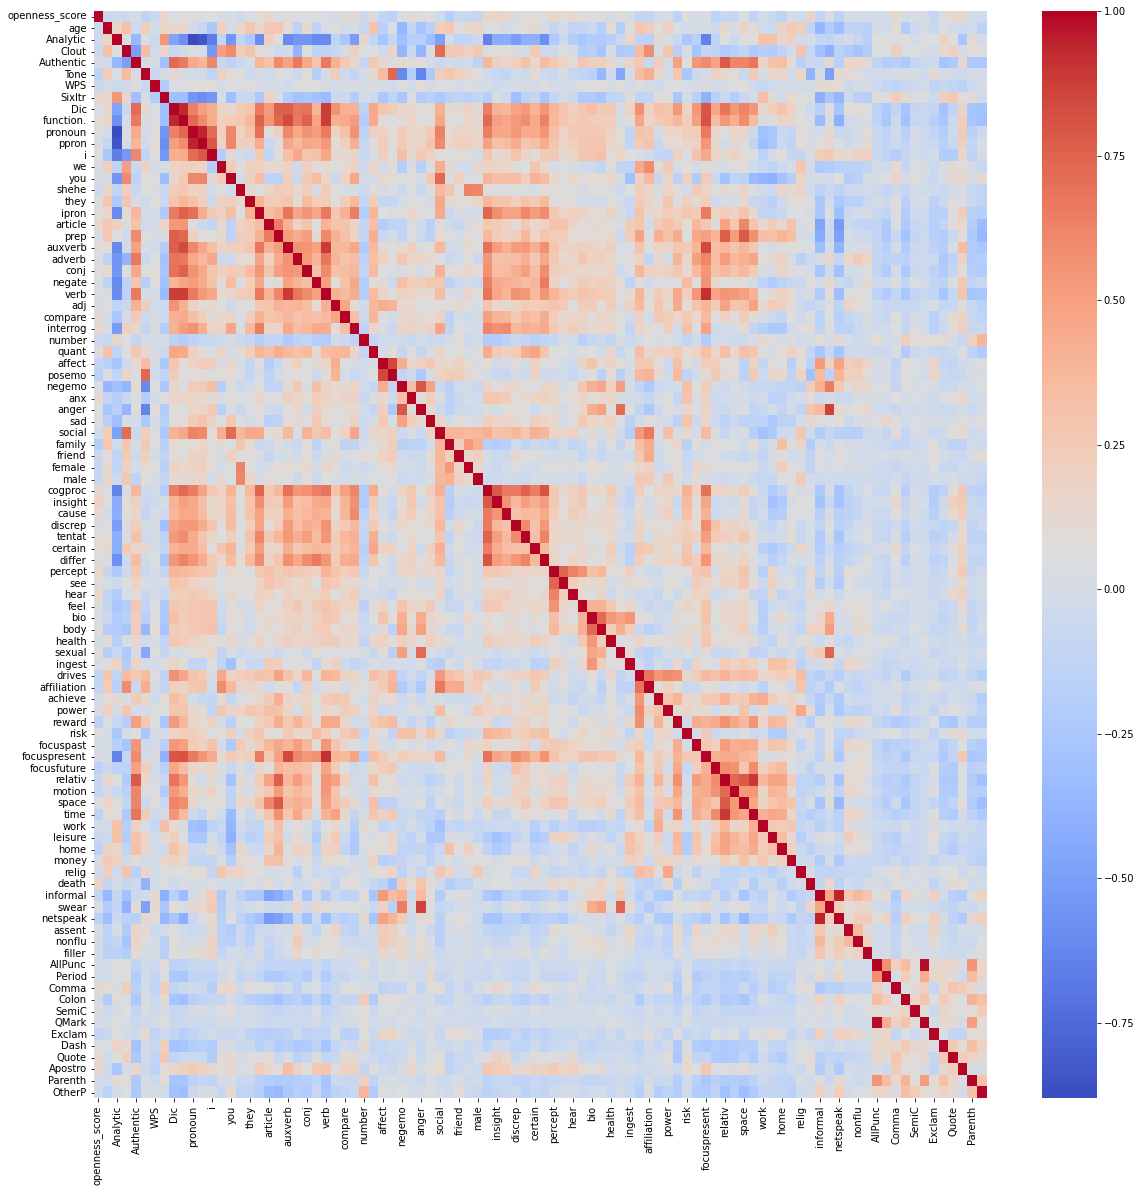

In [ ]:
# Check correlation of features
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20)) 
g = sns.heatmap(df_merge_2.corr(),
                #annot = True, 
                cmap = "coolwarm")

# Since there are too many features in the dataset, I only deal with the feature with high positive(red) or negative (blue) correlation
# ppron and pronoun are highly negative to Analytic and they positively correlated to each other, so I drop both of them
# AllPunc and Exclam are highly positvie correlated
# informal and netspeak are highly positive correlated

In [ ]:
# this function returns column metadata for column name, data type, percentage of missing values, number of unique values, and basic statistics for interval columns 
def metadata(df):
  columns_list = list(df.columns.values) # get a list of column names 
  type_list = [str(item) for item in list(df.dtypes)] # get data types 
  missing_list = [round(float(num),2) for num in list((df.isnull().sum()/len(df)*100))] # find percentage of missing values 
  unique_list = [int(nunique) for nunique in list(df.nunique())] # find unique values for each column 
  # return basic stats for interval columns (i.e. not a category or object datatype and more than 10 unique values) 
  desc_interval = df[[item for item in columns_list 
              if str(df[item].dtypes) != 'category' 
              and df[item].nunique()>=10
              and str(df[item].dtypes) != 'object']].describe().loc[['mean', 'std', 'min','25%', '50%', '75%', 'max']].transpose().reset_index().rename(columns = {'index':'column_name'})

  metadata = pd.DataFrame(columns_list, columns=['column_name'])
  metadata['datatype'] = type_list
  metadata['missing_percent'] = missing_list
  metadata['unique'] = unique_list
  metadata = pd.merge(metadata, desc_interval, on='column_name', how='left')
  return metadata

In [ ]:
metadata(df_merge_2)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,userid,object,0.0,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,message,object,0.0,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,openness_score,float64,0.0,99,3.870087,0.857786,1.00,3.2500,3.925,4.6500,5.00
3,openness,category,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,gender,category,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,age,int64,0.0,52,26.219333,9.341716,2.00,20.0000,23.000,29.0000,64.00
6,Analytic,float64,0.0,2324,55.060547,15.465600,7.77,44.0025,55.220,66.2175,92.84
7,Clout,float64,0.0,2316,54.438440,15.195306,10.15,43.7550,54.265,64.7225,96.93
8,Authentic,float64,0.0,2421,58.086037,21.013958,1.00,45.9400,61.500,73.8525,99.00
9,Tone,float64,0.0,2276,70.227607,24.797471,1.00,52.8200,76.120,91.7925,99.00


In [ ]:
def data_exploration (df, column): 
 ## this is same as previously to create plot unique values for categorical variables with less than 10 unique values
    if (str(df[column].dtypes) == 'object'or str(df[column].dtypes) == 'category'):
        if df[column].nunique()<10:
            count_value = df.groupby([column]).size().reset_index(name='counts')
            count_value['%count'] = [round(num/len(df)*100,2) for num in list(count_value['counts'])]
            print(count_value)
            value_list = count_value[column].tolist()
            count_list = count_value['counts'].tolist()
            fig = plt.figure(figsize=(8, 4))
            plt.bar(x=value_list, height= count_list)
            plt.xticks(fontsize=12)
            plt.show()
        else:
            print(column + ' has more than 10 unique values')
    else:
        mean = df[column].describe()['mean']
        std = df[column].describe()['std']
        outlier = df[((df[column]-mean)/std >3) | ((df[column]-mean)/std <-3)][column].tolist()
        if len(outlier) > 0:
            print('There are ' + str(len(outlier)) + ' of outliers for ' + column + '.')
            print(outlier)
        else:
            print('There is no outlier of ' + column + '.')

        ## this is to create box plot  
        print('----------------------Box plot---------------------')
        df[column].plot.box(title=column, whis =(5,95))
        plt.grid()
        plt.show()

        ## this is to plot interval column distribution by a decile 
        min_value = float(df[column].describe()['min'])
        max_value = float(df[column].describe()['max'])
        if df[column].nunique() >= 10:
            para = (max_value - min_value) / 10
            para_list = np.arange(min_value, max_value, para).round(decimals=2).tolist()
            count_table = df.loc[:, [column]]
            for num in para_list:
                count_table.loc[count_table[column] >= num, 'range'] = num
            count_table_sum = count_table.groupby(['range']).size().reset_index(name='counts')
            value_list = count_table_sum['range'].tolist()
            count_list = count_table_sum['counts'].tolist()
            print('----------------------Distribution plot---------------------')
            fig = plt.figure(figsize=(8, 4))
            plt.bar(x=value_list, height=count_list, width=para, tick_label=value_list, align='edge')
            plt.xticks(rotation=40, fontsize=12)
            plt.grid()
            plt.show()

  gender  counts  %count
0      0    1124   37.47
1      1    1876   62.53


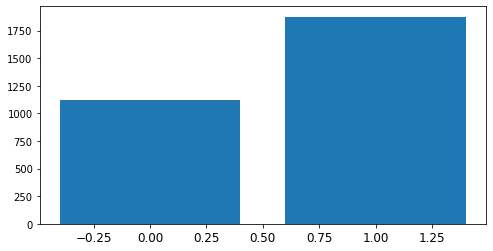

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data_exploration(df_merge_2, 'gender') 

  openness  counts  %count
0        0    1500    50.0
1        1    1500    50.0


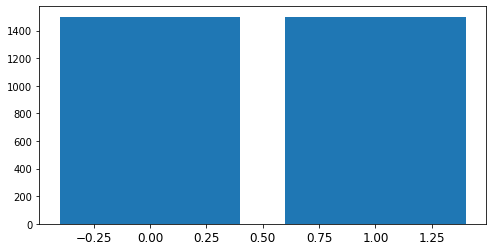

In [ ]:
data_exploration(df_merge_2, 'openness') 

There are 1 of outliers for Analytic.
[7.77]
----------------------Box plot---------------------


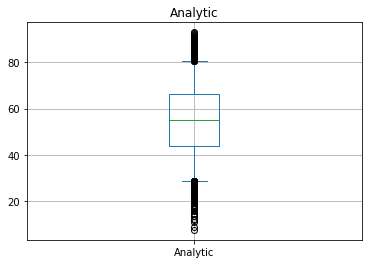

----------------------Distribution plot---------------------


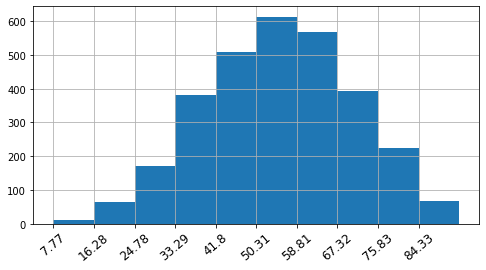

In [ ]:
data_exploration(df_merge_2, 'Analytic') 

In [ ]:
# there is no column with missing value
# Only drop columns because of correlation
df_merge_2.drop(['ppron', 'pronoun', 'AllPunc', 'informal'], axis=1, inplace=True)
df_merge_2.head(3)

,userid,message,openness_score,openness,gender,age,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,swear,netspeak,assent,nonflu,filler,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,4.63,1,0,18,44.79,64.77,37.40,46.21,7.66,13.39,80.21,47.35,5.49,0.78,3.72,0.59,0.46,4.44,5.75,9.34,9.08,5.68,5.68,1.50,17.37,3.07,1.31,1.89,1.63,1.18,5.68,3.40,2.29,0.20,0.91,0.59,10.25,0.59,0.52,0.85,0.72,11.23,2.61,1.76,2.09,2.55,1.18,2.74,3.07,1.57,1.05,0.33,2.55,1.05,0.72,0.52,0.26,5.49,2.35,0.91,1.57,0.85,0.13,3.20,12.48,1.83,10.91,1.50,4.57,5.09,1.24,2.55,0.26,0.85,0.26,0.20,1.24,3.07,0.59,0.52,0.0,11.69,4.70,0.46,0.13,3.14,3.72,1.83,4.70,2.81,1.70,1.63
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,4.50,1,1,25,50.24,80.95,52.74,99.00,13.18,12.81,88.97,50.46,4.64,0.66,3.63,1.40,0.50,4.54,4.76,12.72,9.61,5.71,5.77,1.43,19.50,4.40,1.09,1.78,2.57,1.91,9.97,8.48,1.48,0.24,0.11,0.58,12.39,1.16,0.63,1.43,1.08,9.65,1.91,1.18,1.57,2.05,2.37,1.84,2.83,1.35,0.65,0.77,3.10,0.78,1.05,0.01,0.62,9.38,3.30,1.43,2.29,2.62,0.24,2.87,14.00,3.59,15.99,2.41,6.69,7.28,1.14,1.92,0.90,0.46,2.58,0.03,0.01,2.07,0.36,0.17,0.0,13.43,1.79,0.46,0.05,0.19,3.03,0.59,0.44,1.70,0.78,3.00
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,1.50,0,0,51,43.55,66.36,71.99,96.21,26.54,11.25,92.17,54.67,8.12,1.09,2.76,1.25,0.48,4.54,5.87,11.44,9.55,4.25,6.40,1.62,18.47,5.04,2.07,1.22,1.43,2.63,7.59,6.21,1.35,0.16,0.27,0.64,12.95,1.51,0.82,0.85,1.78,9.85,2.18,0.58,1.41,2.42,1.86,2.76,2.52,1.04,0.69,0.66,3.11,0.58,1.38,0.03,0.24,10.48,4.01,1.09,4.03,1.80,0.29,4.56,12.39,1.65,14.09,1.75,5.89,6.42,2.28,1.17,0.96,0.16,2.63,0.27,0.08,0.24,0.13,0.19,0.0,3.98,2.34,0.08,0.00,1.19,0.42,0.05,0.42,1.22,0.16,0.29


In [ ]:
# Scaling features
from sklearn.preprocessing import StandardScaler
X_ner = df_merge_2.iloc[:, 4:]
scaler = StandardScaler()

# transform data
X_ner_scaled = scaler.fit_transform(X_ner)
X_ner_scaled

array([[-1.29191298, -0.87999935, -0.66420046, ...,  0.50226948,
         0.97138283, -0.17658801],
       [ 0.77404594, -0.13054739, -0.31174673, ..., -0.40368626,
         0.05426293,  0.34462733],
       [-1.29191298,  2.6531313 , -0.74439176, ..., -0.79545091,
        -0.56379614, -0.68638987],
       ...,
       [ 0.77404594, -0.45174109, -1.0347619 , ..., -1.02398028,
        -0.20492313, -0.1803925 ],
       [ 0.77404594, -0.02348283, -0.40810564, ..., -0.77096562,
        -0.64354569, -0.7168258 ],
       [ 0.77404594, -0.77293478, -0.10803494, ..., -1.11375968,
        -0.57376483, -0.29452724]])

In [ ]:
# Scaled data
df_merge_3 = pd.DataFrame(X_ner_scaled, columns=df_merge_2.columns[4:])
df_merge_3.head(3)

,gender,age,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,swear,netspeak,assent,nonflu,filler,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,-1.291913,-0.879999,-0.664200,0.680031,-0.984559,-0.968712,-0.377551,0.070255,-0.175566,0.153532,-0.149937,0.401335,1.080160,-0.248227,0.140399,-0.061966,0.557853,-0.655481,0.570292,0.552051,0.627378,-0.590622,0.271263,-1.692320,-0.850431,0.959806,-0.570583,-1.347681,-1.311673,-1.200975,-0.367007,-0.164747,-0.005153,0.056181,0.485464,-0.108457,0.194242,0.228046,-0.323049,0.648557,1.350671,1.457066,0.818304,0.362557,-0.824793,0.239308,0.451464,1.104047,1.002405,-1.354682,-0.590042,0.155210,-0.411615,1.072290,-0.958374,-1.224982,-0.062502,-0.860257,-0.734179,-1.679544,-1.490454,0.350637,0.162012,-0.298604,-1.151005,-1.181696,-0.958667,-0.833226,-0.434943,0.900916,-0.875817,1.394623,-0.538412,-0.063365,0.914467,0.199558,0.506337,0.325782,-0.61824,-0.187899,0.845575,-0.304566,-0.041363,-0.022707,-0.411768,0.865322,4.203480,0.502269,0.971383,-0.176588
1,0.774046,-0.130547,-0.311747,1.745011,-0.254446,1.160489,-0.103107,-0.152010,0.665379,0.573722,-0.574843,0.102494,1.006327,1.292175,0.293228,0.024330,-0.223712,0.908724,0.888515,0.576413,0.702296,-0.716845,0.995988,-0.225532,-1.341837,0.732561,0.257438,0.141620,0.867453,1.643544,-1.152890,0.116112,-1.301621,0.020906,1.336516,1.058772,0.610179,1.319924,0.360706,-0.082357,0.169818,-0.059522,-0.167072,-0.379931,1.432905,-1.032003,0.126065,0.574874,-0.206939,0.123617,-0.047473,-0.455734,0.465594,-0.649785,-0.204156,1.442604,1.021551,0.214453,0.426400,1.169414,-0.927832,-0.002741,0.824953,2.192320,0.499635,0.233540,0.718343,0.309056,-0.545791,0.130174,0.656476,0.007835,3.388554,-0.930675,-0.890576,-0.268119,-0.281941,-0.810364,-0.61824,-0.051936,-0.741265,-0.304566,-0.277782,-0.062881,-0.515648,-0.292320,-0.505649,-0.403686,0.054263,0.344627
2,-1.291913,2.653131,-0.744392,0.784686,0.661764,1.047959,0.561128,-0.749827,0.972574,1.142533,1.164774,1.173340,0.292602,1.006916,0.216814,0.024330,0.652588,0.316363,0.852490,-0.609199,1.226723,-0.374239,0.645534,0.480290,0.847155,-0.424321,-0.746758,1.610519,-0.341479,0.372470,-1.279020,-0.445606,-1.042328,0.232556,1.559221,1.775491,1.328615,0.228046,1.690230,0.010163,0.625290,-1.628406,-0.470264,0.169510,0.465320,0.267559,-0.294242,-0.170779,-0.086004,-0.245958,-0.037608,-0.908285,1.342803,-0.582253,-1.000275,2.196935,1.831739,-0.488242,3.231134,-0.150442,-0.672095,1.806986,0.122759,-0.553358,-0.117730,-0.792895,0.085509,-0.139511,0.717871,-0.787376,0.800128,-1.058925,3.473187,0.293763,-0.787850,-1.123967,-1.070219,-0.745441,-0.61824,-0.790355,-0.441347,-0.696013,-0.425543,-0.049263,-0.908585,-0.796455,-0.527758,-0.795451,-0.563796,-0.686390


In [ ]:
# final knowledge-driven dataset
df_metadata = df_merge_2.iloc[:, :4]
df_merge_scaled = pd.concat([df_metadata, df_merge_3], axis = 1)
df_merge_scaled.head(3)

,userid,message,openness_score,openness,gender,age,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,swear,netspeak,assent,nonflu,filler,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,4.63,1,-1.291913,-0.879999,-0.664200,0.680031,-0.984559,-0.968712,-0.377551,0.070255,-0.175566,0.153532,-0.149937,0.401335,1.080160,-0.248227,0.140399,-0.061966,0.557853,-0.655481,0.570292,0.552051,0.627378,-0.590622,0.271263,-1.692320,-0.850431,0.959806,-0.570583,-1.347681,-1.311673,-1.200975,-0.367007,-0.164747,-0.005153,0.056181,0.485464,-0.108457,0.194242,0.228046,-0.323049,0.648557,1.350671,1.457066,0.818304,0.362557,-0.824793,0.239308,0.451464,1.104047,1.002405,-1.354682,-0.590042,0.155210,-0.411615,1.072290,-0.958374,-1.224982,-0.062502,-0.860257,-0.734179,-1.679544,-1.490454,0.350637,0.162012,-0.298604,-1.151005,-1.181696,-0.958667,-0.833226,-0.434943,0.900916,-0.875817,1.394623,-0.538412,-0.063365,0.914467,0.199558,0.506337,0.325782,-0.61824,-0.187899,0.845575,-0.304566,-0.041363,-0.022707,-0.411768,0.865322,4.203480,0.502269,0.971383,-0.176588
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,4.50,1,0.774046,-0.130547,-0.311747,1.745011,-0.254446,1.160489,-0.103107,-0.152010,0.665379,0.573722,-0.574843,0.102494,1.006327,1.292175,0.293228,0.024330,-0.223712,0.908724,0.888515,0.576413,0.702296,-0.716845,0.995988,-0.225532,-1.341837,0.732561,0.257438,0.141620,0.867453,1.643544,-1.152890,0.116112,-1.301621,0.020906,1.336516,1.058772,0.610179,1.319924,0.360706,-0.082357,0.169818,-0.059522,-0.167072,-0.379931,1.432905,-1.032003,0.126065,0.574874,-0.206939,0.123617,-0.047473,-0.455734,0.465594,-0.649785,-0.204156,1.442604,1.021551,0.214453,0.426400,1.169414,-0.927832,-0.002741,0.824953,2.192320,0.499635,0.233540,0.718343,0.309056,-0.545791,0.130174,0.656476,0.007835,3.388554,-0.930675,-0.890576,-0.268119,-0.281941,-0.810364,-0.61824,-0.051936,-0.741265,-0.304566,-0.277782,-0.062881,-0.515648,-0.292320,-0.505649,-0.403686,0.054263,0.344627
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,1.50,0,-1.291913,2.653131,-0.744392,0.784686,0.661764,1.047959,0.561128,-0.749827,0.972574,1.142533,1.164774,1.173340,0.292602,1.006916,0.216814,0.024330,0.652588,0.316363,0.852490,-0.609199,1.226723,-0.374239,0.645534,0.480290,0.847155,-0.424321,-0.746758,1.610519,-0.341479,0.372470,-1.279020,-0.445606,-1.042328,0.232556,1.559221,1.775491,1.328615,0.228046,1.690230,0.010163,0.625290,-1.628406,-0.470264,0.169510,0.465320,0.267559,-0.294242,-0.170779,-0.086004,-0.245958,-0.037608,-0.908285,1.342803,-0.582253,-1.000275,2.196935,1.831739,-0.488242,3.231134,-0.150442,-0.672095,1.806986,0.122759,-0.553358,-0.117730,-0.792895,0.085509,-0.139511,0.717871,-0.787376,0.800128,-1.058925,3.473187,0.293763,-0.787850,-1.123967,-1.070219,-0.745441,-0.61824,-0.790355,-0.441347,-0.696013,-0.425543,-0.049263,-0.908585,-0.796455,-0.527758,-0.795451,-0.563796,-0.686390


## Part 4: Supervised leaning

In [ ]:
# required packages
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD

import numpy as np
np.random.seed()
import random
random.seed()

### Classification model that uses TF-IDF vectors

In [ ]:
# TF-IDF data
message_tf_idf.head(3)

,userid,message_x,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message,Message_Length,Cleaned_Message_Length,Lexical_Diversity,Count_Potential_Misspells,messageID,still,piss,official,chillin,like,think,put,cartoon,character,profile,picture,realize,would,absolutely,nothing,girl,shut,lip,talk,know,much,facebook,bad,thing,skip,week,play,let,roll,watch,cry,lot,shit,easily,...,get,pic,white,wash,wear,purple,accident,sing,today,little,please,pray,send,thought,prayer,dear,friend,long,lose,husband,due,heart,issue,keep,three,beautiful,kid,break,want,thank,lord,everytime,hear,always,come,along,make,shout,ask,everyone,say,joy,need,special,touch,try,new,ready,going,fun,girls,day,love,bed,hope,merry,christmas,remember,thanks,god,son,excited,dad,town,never,see,blessing,yay,favorite,movie,first,club,second,everything,back,excite,church,morning,home,enjoy,tree,lol,already,ride,rid,faith,world,set,free,hang,hair,help,....,walmart,crazy,sleep,working,soooo,tire,good,thankful,family,graduation,eat,jack,sarah,dinner,hehehe,shopping,christ,happy,work,store,life,laugh,florida,tell,snow,sat,sun,funny,window,open,door,haha,blanket,warm,mom,birthday,!!!!,also,spending,well,finger,paint,really,school,christian,........,people,call,may,bring,close,one,way,relax,pretty,sure,could,turn,teen,house,trust,glad,okay,sweet,dream,years,eve,band,practice,tomorrow,camp,nail,buy,cute,flip,miss,sorry,cannot,text,yet,live,.......,babysitting,amazing,plan,answer,right,find,time,tonight,blessed,weekend,shop,something,looking,forward,david,row,wonderful,lead,direction,feeling,together,lovin,take,food,tea,sad,able,start,spring,happen,reason,save,money,place,anyone,...?,kind,upset,although,many,great,include,team,wake,wife,"""...",cool,brother,sister,law,sense,wonder,fill,single,breath,grant,ever,leave,empty,hand,feel,small,stand,beside,ocean,whenever,promise,give,chance,choice,sit,dance,sunshine,smile,face,real,wait,letter,cross,youth,sunday,blue,bank,game,music,word,course,message_y,pack,next,:)),look,song,wedding,saturday,another,fair,move,!!!!!!!,jesus,!!!,wish,best,!!!!!!,catch,rest,head,night,katie,vote,last,someone,sick,yes,room,spell,two,chair,rather,large,brick,flat,rock,use,flower,skill,around,believe,happens,change,learn,sometimes,fall,apart,awake,spend,grass,stop,high,angel,south,afford,strength,rough,hole,basketball,peep,fire,yellow,shine,light,soft,quite,calm,glass,sea,finish,grace,super,concert,soon,mean,since,friends,beat,important,everyday,student,especially,hood,year,ago,bless,cut,man,actually,fell,thru,hell,continue,grow,lucky,choose,even,blood,every,frame,clean,run,across,box,precious,experience,jay,ball,job,interview,class,whole,month,push,teach,seem,child,write,lesson,till,monday,goodbye,throat,tear,eye,saw,felt,request,book,old,big,hard,state,safe,street,fear,hate,red,neck,might,person,perfect,body,1st,pretend,else,proud,post,status,hot,cold,drink,partner,care,floor,bit,maybe,win,fail,confuse,fuck,bullshit,freak,pump,wall,friday,somebody,far,enough,guess,without,everybody,involve,pressure,kitty,cheese,brown,name,hannah,computer,starbucks,eventually,party,hold,part,shot,lost,cause,...,recommend,unless,!!!!!!!!!!!!!,awful,farmville,cafe,dress,makeup,found,leg,broke,myspace,gaga,album,january,butterfly,mommy,lots,dvd,chris,dirt,university,seven,gum,festival,3rd,bus,fat,freaking,taco,machine,edge,speak,pop,pet,tan,ashamed,weight,tight,tall,pink,obviously,likely,obsess,trash,fashion,log,lab,guys,social,quiet,soul,asshole,july,doubt,hahaha,gym,spin,dude,brand,momma,teeth,bug,follow,link,:-),sometime,boo,passion,risk,lyric,clue,bee,pumpkin,share,bubble,rice,butter,argue,zoo,michael,fool,piano,boat,photo,scott,art,load,jacket,broken,reality,coming,crew,soldier,killer,imagine,several,marry,lunch,pot,normal,wed,mac,review,fee,hotel,quote,tongue,decent,rule,order,contemplate,rainbow,sadness,done,puzzle,enter,august,marathon,suffer,horror,breathe,cooky,plane,therefore,smart,slide,freeze,third,tour,title,

In [ ]:
# Merge with openness data
message_tf_idf_openness = pd.merge(left=df_open, right=message_tf_idf, left_on='userid', right_on='userid')
message_tf_idf_openness.head(3)

,userid,openness_score,openness,gender,age_x,message_x,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message,Message_Length,Cleaned_Message_Length,Lexical_Diversity,Count_Potential_Misspells,messageID,still,piss,official,chillin,like,think,put,cartoon,character,profile,picture,realize,would,absolutely,nothing,girl,shut,lip,talk,know,much,facebook,bad,thing,skip,week,play,let,roll,watch,cry,lot,shit,easily,...,get,pic,white,wash,wear,purple,accident,sing,today,little,please,pray,send,thought,prayer,dear,friend,long,lose,husband,due,heart,issue,keep,three,beautiful,kid,break,want,thank,lord,everytime,hear,always,come,along,make,shout,ask,everyone,say,joy,need,special,touch,try,new,ready,going,fun,girls,day,love,bed,hope,merry,christmas,remember,thanks,god,son,excited,dad,town,never,see,blessing,yay,favorite,movie,first,club,second,everything,back,excite,church,morning,home,enjoy,tree,lol,already,ride,rid,faith,world,set,free,hang,hair,help,....,walmart,crazy,sleep,working,soooo,tire,good,thankful,family,graduation,eat,jack,sarah,dinner,hehehe,shopping,christ,happy,work,store,life,laugh,florida,tell,snow,sat,sun,funny,window,open,door,haha,blanket,warm,mom,birthday,!!!!,also,spending,well,finger,paint,really,school,christian,........,people,call,may,bring,close,one,way,relax,pretty,sure,could,turn,teen,house,trust,glad,okay,sweet,dream,years,eve,band,practice,tomorrow,camp,nail,buy,cute,flip,miss,sorry,cannot,text,yet,live,.......,babysitting,amazing,plan,answer,right,find,time,tonight,blessed,weekend,shop,something,looking,forward,david,row,wonderful,lead,direction,feeling,together,lovin,take,food,tea,sad,able,start,spring,happen,reason,save,money,place,anyone,...?,kind,upset,although,many,great,include,team,wake,wife,"""...",cool,brother,sister,law,sense,wonder,fill,single,breath,grant,ever,leave,empty,hand,feel,small,stand,beside,ocean,whenever,promise,give,chance,choice,sit,dance,sunshine,smile,face,real,wait,letter,cross,youth,sunday,blue,bank,game,music,word,course,message_y,pack,next,:)),look,song,wedding,saturday,another,fair,move,!!!!!!!,jesus,!!!,wish,best,!!!!!!,catch,rest,head,night,katie,vote,last,someone,sick,yes,room,spell,two,chair,rather,large,brick,flat,rock,use,flower,skill,around,believe,happens,change,learn,sometimes,fall,apart,awake,spend,grass,stop,high,angel,south,afford,strength,rough,hole,basketball,peep,fire,yellow,shine,light,soft,quite,calm,glass,sea,finish,grace,super,concert,soon,mean,since,friends,beat,important,everyday,student,especially,hood,year,ago,bless,cut,man,actually,fell,thru,hell,continue,grow,lucky,choose,even,blood,every,frame,clean,run,across,box,precious,experience,jay,ball,job,interview,class,whole,month,push,teach,seem,child,write,lesson,till,monday,goodbye,throat,tear,eye,saw,felt,request,book,old,big,hard,state,safe,street,fear,hate,red,neck,might,person,perfect,body,1st,pretend,else,proud,post,status,hot,cold,drink,partner,care,floor,bit,maybe,win,fail,confuse,fuck,bullshit,freak,pump,wall,friday,somebody,far,enough,guess,without,everybody,involve,pressure,kitty,cheese,brown,name,hannah,computer,starbucks,eventually,party,hold,...,recommend,unless,!!!!!!!!!!!!!,awful,farmville,cafe,dress,makeup,found,leg,broke,myspace,gaga,album,january,butterfly,mommy,lots,dvd,chris,dirt,university,seven,gum,festival,3rd,bus,fat,freaking,taco,machine,edge,speak,pop,pet,tan,ashamed,weight,tight,tall,pink,obviously,likely,obsess,trash,fashion,log,lab,guys,social,quiet,soul,asshole,july,doubt,hahaha,gym,spin,dude,brand,momma,teeth,bug,follow,link,:-),sometime,boo,passion,risk,lyric,clue,bee,pumpkin,share,bubble,rice,butter,argue,zoo,michael,fool,piano,boat,photo,scott,art,load,jacket,broken,reality,coming,crew,soldier,killer,imagine,several,marry,lunch,pot,normal,wed,mac,review,fee,hotel,quote,tongue,decent,rule,order,contemplate,rainbow,sadness,done,puzzle,enter,august,marathon,suffer,horror,breathe,cooky,plane,therefore,smart,slide,freeze,t

In [ ]:
# Check input part
message_tf_idf_openness.columns[18:]

Index(['still', 'piss', 'official', 'chillin', 'like', 'think', 'put',
       'cartoon', 'character', 'profile',
       ...
       'believer', 'pride', 'ryan', 'strawberry', 'pancake', 'whip', 'wise',
       'haunt', 'somethin', 'grill'],
      dtype='object', length=2026)

In [ ]:
#train/test split (full feature set)

X_train, X_test, y_train, y_test = train_test_split(message_tf_idf_openness.iloc[:, 18:], 
                                                    message_tf_idf_openness['openness'], stratify=message_tf_idf_openness['openness'],
                                                    test_size=0.2, random_state=777) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 2400
The shape of training/test feature set: (2400, 2026)
The length of testing  set: 600


In [ ]:
# use leaf size to select the baseline Tree model
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=777)

for leafsize in range (5,155,5):
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=777)
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

5 0.5329166666666666
10 0.5245833333333334
15 0.5275
20 0.5233333333333332
25 0.53
30 0.5320833333333332
35 0.5316666666666667
40 0.5325
45 0.5137499999999999
50 0.5425
55 0.5391666666666667
60 0.5445833333333334
65 0.5429166666666667
70 0.5304166666666666
75 0.5383333333333333
80 0.5349999999999999
85 0.54125
90 0.54875
95 0.5475000000000001
100 0.5466666666666667
105 0.5575
110 0.5454166666666667
115 0.5491666666666666
120 0.55
125 0.54625
130 0.5462499999999999
135 0.54125
140 0.5416666666666666
145 0.5462499999999999
150 0.5483333333333333


In [ ]:
# Use the best leaf size (min_samples_leaf) 105 to build the baseline model
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
def grid_search_grad_boost(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad = GradientBoostingClassifier(min_samples_leaf =105, random_state = 777)
    grid_search = GridSearchCV(grad, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
# hyper-parameter tuning 

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 300, 500],
    'max_features' : ['sqrt', 'log2']
}

%time grid_search_grad_boost(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best score: 0.586
Best parameters set:
	learning_rate: 0.1
	max_features: 'sqrt'
	n_estimators: 100
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       300
           1       0.54      0.47      0.50       300

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600

CPU times: user 3.67 s, sys: 398 ms, total: 4.07 s
Wall time: 3min 24s


In [ ]:
# Use the tuned hyper-parameter to fit the model

clf_grad = GradientBoostingClassifier(min_samples_leaf =105, n_estimators = 100, learning_rate = 0.1, 
                                      max_features = 'sqrt', random_state = 777)
%time clf_grad.fit(X_train,y_train)
# Predict Performance
print(clf_grad.score (X_test ,y_test))

y_predict = clf_grad.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 448 ms, sys: 1.94 ms, total: 450 ms
Wall time: 451 ms
0.5316666666666666


,Predicted Not Good,Predicted Good
True Not Good,178,122
True Good,159,141


In [ ]:
# append the result to performance table
fields = ['model', 'precision', 'recall', 'accuracy', 'f1']
table  = {}
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict)}
table['Gradient Boosting with full TF-IDF vectors'] = scores

### Classification model that uses SVD reduced TF-IDF vectors

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X = message_tf_idf_openness.iloc[:, 18:]

var_explained = []
for i in range(2, 300):
  svd = TruncatedSVD(n_components= i)
  svd.fit(X) 
  var_explained.append(svd.explained_variance_ratio_.sum())

Text(0, 0.5, 'Total variance explained')

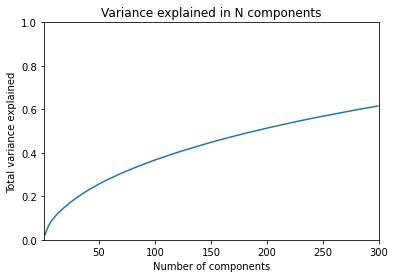

In [ ]:
import matplotlib.pyplot as plt

# Plot the variance explained 
x_axis = [i for i in range(2, 300)]
plt.plot(x_axis, var_explained)
plt.axis ([1, 300, 0, 1])
plt.title("Variance explained in N components")
plt.xlabel("Number of components")
plt.ylabel("Total variance explained")

In [ ]:
# determining the number of components with a threshold if variance explained ≥0.6

n = 0
for i in range(len(var_explained)):
  if var_explained[i] >= 0.6:
    n = i
    break
print("The Least Number of Components if Variance Explained ≥ 0.6:", n)

The Least Number of Components if Variance Explained ≥ 0.6: 281


In [ ]:
# Based on the graph above, we chose to reduce the original input features to 281 SVs
from sklearn.decomposition import TruncatedSVD

X = message_tf_idf_openness.iloc[:, 18:]

svd = TruncatedSVD(n_components= 281)
svd.fit(X)
X_svd = svd.transform(X)
X_svd.shape

(3000, 281)

In [ ]:
# Test/train split (reduced feature set)
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X_svd, 
                                                    message_tf_idf_openness['openness'], stratify=message_tf_idf_openness['openness'],
                                                    test_size=0.2, random_state=777) 

print("The length of training set:", len(X_train_svd))
print("The shape of training/test feature set:", X_train_svd.shape)
print("The length of testing  set:", len(X_test_svd))

The length of training set: 2400
The shape of training/test feature set: (2400, 281)
The length of testing  set: 600


In [ ]:
# use leaf size to select the baseline Tree model
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=777)

for leafsize in range (5,155,5):
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=777)
    score=np.mean(cross_val_score(tree_classifier,X_train_svd,y_train_svd,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

5 0.5154166666666666
10 0.5116666666666667
15 0.5125
20 0.5233333333333333
25 0.5287499999999999
30 0.5283333333333332
35 0.5216666666666667
40 0.5287499999999999
45 0.5329166666666667
50 0.54
55 0.5466666666666666
60 0.5337500000000001
65 0.5420833333333334
70 0.5416666666666666
75 0.5425
80 0.5516666666666666
85 0.5433333333333333
90 0.5320833333333332
95 0.5312500000000001
100 0.5370833333333334
105 0.5370833333333332
110 0.5316666666666666
115 0.5345833333333332
120 0.5333333333333333
125 0.5337500000000002
130 0.5337500000000002
135 0.5362500000000001
140 0.5345833333333333
145 0.5375
150 0.5349999999999999


In [ ]:
# Use the best leaf size (min_samples_leaf) 80 to build the baseline model
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
def grid_search_grad_boost_svd(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad = GradientBoostingClassifier(min_samples_leaf =80, random_state = 777)
    grid_search = GridSearchCV(grad, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
# hyper-parameter tuning 

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 300, 500],
    'max_features' : ['sqrt', 'log2']
}

%time grid_search_grad_boost_svd(X_train_svd, X_test_svd, y_train_svd, y_test_svd, param_grid)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best score: 0.599
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 100
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       300
           1       0.57      0.53      0.55       300

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.56       600
weighted avg       0.56      0.56      0.56       600

CPU times: user 6.42 s, sys: 801 ms, total: 7.22 s
Wall time: 11min 11s


In [ ]:
# Use the tuned hyper-parameter to fit the model

clf_grad = GradientBoostingClassifier(min_samples_leaf =80, n_estimators = 100, learning_rate = 0.1, 
                                      max_features = 'log2', random_state = 777) 
%time clf_grad.fit(X_train_svd,y_train_svd)
# Predict Performance
print(clf_grad.score (X_test_svd,y_test_svd))

y_predict = clf_grad.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 804 ms, sys: 3.74 ms, total: 807 ms
Wall time: 807 ms
0.5633333333333334


,Predicted Not Good,Predicted Good
True Not Good,180,120
True Good,142,158


In [ ]:
# append the result to performance table
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict)}
table['Gradient Boosting with SVD TF-IDF vectors'] = scores

### Classification model that uses GloVe pre-trained 100d vectors

In [ ]:
# GloVe Data
message_AWE.head()

,userid,message,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message,Message_Length,Cleaned_Message_Length,Lexical_Diversity,Count_Potential_Misspells,reviewID,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,AWE39,AWE40,AWE41,AWE42,AWE43,AWE44,AWE45,AWE46,AWE47,AWE48,AWE49,AWE50,AWE51,AWE52,AWE53,AWE54,AWE55,AWE56,AWE57,AWE58,AWE59,AWE60,AWE61,AWE62,AWE63,AWE64,AWE65,AWE66,AWE67,AWE68,AWE69,AWE70,AWE71,AWE72,AWE73,AWE74,AWE75,AWE76,AWE77,AWE78,AWE79,AWE80,AWE81,AWE82,AWE83,AWE84,AWE85,AWE86,AWE87,AWE88,AWE89,AWE90,AWE91,AWE92,AWE93,AWE94,AWE95,AWE96,AWE97,AWE98,AWE99,AWE100
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,is still pissed that Eminem was not in the off...,"[is, still, pissed, that, Eminem, was, not, in...","{dooo, mv, ..., starcraft, ign, hipz, chillin,...","[(is, VBZ), (still, RB), (pissed, VBN), (that,...","[be, still, piss, that, Eminem, be, not, in, t...","[still, piss, eminem, official, airplanes, rec...",still piss eminem official airplanes recording...,160,67,1.030769,15,0,0.126204,0.051399,0.068208,0.16774,-0.1216,0.22828,0.030083,0.007267,0.067808,0.109784,-0.002635,-0.138202,-4.056448,0.018806,0.106465,-0.02353,-0.021743,-0.098868,-0.335504,-0.075225,-0.067309,0.004155,-0.062453,0.025764,0.070476,-0.616877,-0.096708,-0.115436,0.161491,-0.146914,-0.109143,0.077233,-0.220322,0.072234,-0.058486,0.157178,0.037394,-0.082752,0.057384,-0.0792,-0.855387,-0.042185,-0.020259,0.067957,0.279022,-0.169728,0.135293,0.135451,-0.080486,-0.065716,-0.225779,0.088203,0.066654,-0.14367,0.075136,0.063296,-0.239192,0.056181,0.141001,0.122941,-0.02692,0.023228,0.073261,-0.043044,0.173602,-0.107175,-0.180663,-0.054877,-0.060417,0.104764,0.148921,0.110542,0.013851,-0.194685,0.011342,-0.032971,-0.0945,-0.096239,-0.172366,0.047617,1.26338,0.174856,-0.155934,0.003838,0.096238,0.16271,-0.044577,0.15303,-0.109352,0.002705,0.007908,0.029693,-0.000733,-0.017029,-0.149396,-0.039829,0.054508,-0.214516,0.101602,-0.034314
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...","{carlee, fannins, ison, ...., !!!!, ;), :(, .....","[(is, VBZ), (singing, VBG), (today, NN), (and,...","[be, sing, today, and, be, a, little, nurvous,...","[sing, today, little, nurvous, please, pray, s...",sing today little nurvous please pray send tho...,2423,1081,2.188259,80,1,0.092567,0.064296,0.137235,0.126754,-0.051018,0.183716,0.131616,0.093039,0.027971,-0.007741,-0.074099,-0.089998,-4.629097,-0.033635,-0.046276,-0.157923,-0.101695,-0.076704,-0.419082,-0.083346,-0.054924,0.04869,-0.124748,0.020203,0.148647,-0.403889,-0.006304,-0.008023,0.195069,-0.165832,-0.186425,0.085873,-0.240291,0.017824,0.096447,0.147674,0.053734,-0.083143,-0.007576,-0.014626,-0.821914,0.006487,0.076514,0.030595,0.318372,-0.075332,0.158476,-0.030516,-0.075076,0.049255,-0.250908,-0.136038,0.107353,-0.094222,0.04869,0.092044,-0.222146,0.001668,0.127591,0.122393,0.011925,-0.003825,-0.031404,-0.061277,0.179256,-0.090972,-0.226893,-0.096696,-0.050611,0.069029,0.145128,0.036565,0.080911,-0.038361,0.134048,-0.030276,-0.072156,-0.154962,-0.04959,0.02351,1.55344,0.210963,-0.091459,0.039474,0.149974,0.127061,-0.119055,0.149484,-0.016567,-0.023735,0.013952,0.030582,0.08049,0.064772,-0.198885,-0.11866,-0.018449,-0.147387,0.176635,-0.068874
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,I had a wonderful day at Anderson I am beat bu...,"[I, had, a, wonderful, day, at, Anderson, I, a...","{..., !"", ms, thru, 1st}","[(I, PRP), (had, VBD), (a, DT), (wonderful, JJ...","[I, have, a, wonderful, day, at, Anderson, I, ...","[wonderful, day, anderson, beat, good, beat, i...",wonderf

In [ ]:
# Merge with openness data
message_AWE_openness = pd.merge(left=df_open, right=message_AWE, left_on='userid', right_on='userid')
message_AWE_openness.head(3)

,userid,openness_score,openness,gender,age,message,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message,Message_Length,Cleaned_Message_Length,Lexical_Diversity,Count_Potential_Misspells,reviewID,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,AWE39,AWE40,AWE41,AWE42,AWE43,AWE44,AWE45,AWE46,AWE47,AWE48,AWE49,AWE50,AWE51,AWE52,AWE53,AWE54,AWE55,AWE56,AWE57,AWE58,AWE59,AWE60,AWE61,AWE62,AWE63,AWE64,AWE65,AWE66,AWE67,AWE68,AWE69,AWE70,AWE71,AWE72,AWE73,AWE74,AWE75,AWE76,AWE77,AWE78,AWE79,AWE80,AWE81,AWE82,AWE83,AWE84,AWE85,AWE86,AWE87,AWE88,AWE89,AWE90,AWE91,AWE92,AWE93,AWE94,AWE95,AWE96,AWE97,AWE98,AWE99,AWE100
0,59a9bd425abebea3bd4a7673cd6f6778,4.4,1,0,24,is taking the asvab soon and then enlisting\ti...,is taking the asvab soon and then enlisting i ...,"[is, taking, the, asvab, soon, and, then, enli...","{:), :(, p, nvr, :?, ure, :/, asvab, adress}","[(is, VBZ), (taking, VBG), (the, DT), (asvab, ...","[be, take, the, asvab, soon, and, then, enlist...","[take, asvab, soon, enlist, leave, boot, day, ...",take asvab soon enlist leave boot day want wri...,606,262,1.587879,9,1076,0.123275,0.098204,0.13213,0.120732,-0.033335,0.154377,0.136177,0.001108,0.090365,0.103214,-0.034011,-0.178671,-4.720301,0.000857,-0.076912,-0.197135,-0.056852,-0.040709,-0.394592,-0.114138,-0.038148,0.006997,-0.11043,0.0099,0.02674,-0.406626,0.025239,-0.017961,0.114275,-0.147541,-0.135889,0.089533,-0.211564,0.067019,0.016006,0.151177,0.071407,-0.053875,0.083204,0.039896,-0.858663,0.088601,0.07385,-0.017469,0.231402,-0.052012,0.117805,-0.080631,-0.147766,0.070783,-0.185962,-0.023772,0.089029,-0.057108,0.042071,0.083736,-0.227636,-0.02649,0.112216,0.129573,0.029057,0.089815,-0.051125,-0.074656,0.16262,-0.141651,-0.208169,-0.041088,-0.047357,0.089377,0.064617,0.10176,0.094497,-0.032264,0.116051,-0.0664,0.001547,-0.131784,-0.055135,-0.000556,1.580468,0.197126,-0.154516,0.070577,0.166966,0.11627,-0.117293,0.064509,0.008713,-0.041274,-0.071457,0.092475,0.124425,0.02495,-0.166313,-0.119247,-0.060292,-0.080834,0.239683,-0.067712
1,41aad64ae9d362e1a052fd6ae6ff438c,4.8,1,0,29,i think something gets lost in translation whe...,i think something gets lost in translation whe...,"[i, think, something, gets, lost, in, translat...","{errr, ..., !!, ....., zzzzzzzzzzzzzzzzzz, wrk...","[(i, NN), (think, VBP), (something, NN), (gets...","[i, think, something, get, lose, in, translati...","[think, something, get, lose, translation, sen...",think something get lose translation send post...,143,66,1.118644,9,800,0.183325,0.145922,0.098896,0.146606,-0.055284,0.193465,0.102331,-0.021193,0.14553,0.160976,-0.014261,-0.148319,-4.544887,-0.053089,-0.082538,-0.121635,-0.067361,-0.024587,-0.351603,-0.167751,-0.027611,0.039001,-0.150384,0.034508,0.083431,-0.343642,-0.078504,-0.079853,0.213253,-0.136846,-0.133258,0.108913,-0.238597,0.016515,-0.046866,0.132366,0.059857,-0.109741,0.061458,-0.018334,-0.699795,0.039125,-0.002355,-0.018816,0.234127,-0.06171,0.155273,0.061693,-0.211834,0.112088,-0.181027,0.055182,0.082494,-0.059676,0.098119,0.174605,-0.284537,-0.033052,0.077082,0.064565,0.054812,0.025722,0.002629,-0.029715,0.168347,-0.095286,-0.222623,-0.058945,-0.04883,0.130896,0.064934,0.125658,0.066075,-0.192511,0.147012,-0.089173,-0.014771,-0.058299,-0.044203,-0.019453,1.415811,0.281801,-0.099233,-0.058382,0.18563,0.093136,-0.133346,0.047054,-0.037008,-0.096423,-0.089347,0.106623,0.075414,0.042559,-0.139291,-0.12915,-0.035442,-0.155424,0.203938,-0.042178
2,6443ba9a045bb6aeb188770f49bf60e4,4.5,1,1,25,is eating lechon paaksiw....sahhhhrappp :p\tis...,is eating lechon paaksiw....sahhhhrappp :p is ...,"[is, eating, lechon, paaksiw, ...., sahhhhrapp...","{..., rubi, sahhhhrappp, d, !!!!!, ...., d2, c...","[(is, VBZ), (eating, VBG), (lechon, JJ), (paak...","[be, eat, lechon

In [ ]:
# Check for input scope
message_AWE_openness.columns[18:]

Index(['AWE1', 'AWE2', 'AWE3', 'AWE4', 'AWE5', 'AWE6', 'AWE7', 'AWE8', 'AWE9',
       'AWE10', 'AWE11', 'AWE12', 'AWE13', 'AWE14', 'AWE15', 'AWE16', 'AWE17',
       'AWE18', 'AWE19', 'AWE20', 'AWE21', 'AWE22', 'AWE23', 'AWE24', 'AWE25',
       'AWE26', 'AWE27', 'AWE28', 'AWE29', 'AWE30', 'AWE31', 'AWE32', 'AWE33',
       'AWE34', 'AWE35', 'AWE36', 'AWE37', 'AWE38', 'AWE39', 'AWE40', 'AWE41',
       'AWE42', 'AWE43', 'AWE44', 'AWE45', 'AWE46', 'AWE47', 'AWE48', 'AWE49',
       'AWE50', 'AWE51', 'AWE52', 'AWE53', 'AWE54', 'AWE55', 'AWE56', 'AWE57',
       'AWE58', 'AWE59', 'AWE60', 'AWE61', 'AWE62', 'AWE63', 'AWE64', 'AWE65',
       'AWE66', 'AWE67', 'AWE68', 'AWE69', 'AWE70', 'AWE71', 'AWE72', 'AWE73',
       'AWE74', 'AWE75', 'AWE76', 'AWE77', 'AWE78', 'AWE79', 'AWE80', 'AWE81',
       'AWE82', 'AWE83', 'AWE84', 'AWE85', 'AWE86', 'AWE87', 'AWE88', 'AWE89',
       'AWE90', 'AWE91', 'AWE92', 'AWE93', 'AWE94', 'AWE95', 'AWE96', 'AWE97',
       'AWE98', 'AWE99', 'AWE100'],
      dtype='obj

In [ ]:
#train/test split (full feature set)

X_train, X_test, y_train, y_test = train_test_split(message_AWE_openness.iloc[:, 18:], 
                                                    message_AWE_openness['openness'], stratify=message_AWE_openness['openness'],
                                                    test_size=0.2, random_state=777) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 2398
The shape of training/test feature set: (2398, 100)
The length of testing  set: 600


In [ ]:
# use leaf size to select the baseline Tree model
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=777)

for leafsize in range(5,155,5): 
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=777)
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

5 0.5587848675034868
10 0.5584257322175732
15 0.5484013249651325
20 0.5700819386331938
25 0.5667381450488145
30 0.5754811715481172
35 0.5658751743375176
40 0.5692067642956764
45 0.5788005578800558
50 0.5938057880055789
55 0.5892329149232914
60 0.5933995815899582
65 0.5950697350069735
70 0.6029951185495118
75 0.5996617852161785
80 0.5996722454672245
85 0.5934065550906554
90 0.5846548117154812
95 0.5900801952580196
100 0.5883995815899582
105 0.587144351464435
110 0.584644351464435
115 0.5854689679218967
120 0.591312761506276
125 0.591312761506276
130 0.5938284518828452
135 0.5917398884239888
140 0.5925732217573222
145 0.5984187587168759
150 0.5967398884239887


In [ ]:
# Use the best leaf size (min_samples_leaf) 70 to build the baseline model
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
def grid_search_grad_boost_AWE(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad = GradientBoostingClassifier(min_samples_leaf =70, random_state = 777)
    grid_search = GridSearchCV(grad, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
# hyper-parameter tuning 

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 300, 500],
    'max_features' : ['sqrt', 'log2']
}

%time grid_search_grad_boost_AWE(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best score: 0.639
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       300
           1       0.58      0.59      0.59       300

    accuracy                           0.58       600
   macro avg       0.59      0.58      0.58       600
weighted avg       0.59      0.58      0.58       600

CPU times: user 20.1 s, sys: 901 ms, total: 21 s
Wall time: 7min 57s


In [ ]:
# Use the tuned hyper-parameter to fit the model

clf_grad = GradientBoostingClassifier(min_samples_leaf =70, n_estimators = 200, learning_rate = 0.1, 
                                      max_features = 'log2', random_state = 777)
%time clf_grad.fit(X_train_svd,y_train_svd)
# Predict Performance
print(clf_grad.score (X_test_svd,y_test_svd))

y_predict = clf_grad.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 1.61 s, sys: 5.68 ms, total: 1.62 s
Wall time: 1.62 s
0.5766666666666667


,Predicted Not Good,Predicted Good
True Not Good,177,123
True Good,131,169


In [ ]:
# append the result to performance table
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict)}
table['Gradient Boosting with GloVe pre-trained 100d vectors'] = scores

### Classification model that uses all the LIWC features

In [ ]:
# LIWC data
df_merge_scaled.head()

,userid,message,openness_score,openness,gender,age,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,swear,netspeak,assent,nonflu,filler,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,4.63,1,-1.291913,-0.879999,-0.664200,0.680031,-0.984559,-0.968712,-0.377551,0.070255,-0.175566,0.153532,-0.149937,0.401335,1.080160,-0.248227,0.140399,-0.061966,0.557853,-0.655481,0.570292,0.552051,0.627378,-0.590622,0.271263,-1.692320,-0.850431,0.959806,-0.570583,-1.347681,-1.311673,-1.200975,-0.367007,-0.164747,-0.005153,0.056181,0.485464,-0.108457,0.194242,0.228046,-0.323049,0.648557,1.350671,1.457066,0.818304,0.362557,-0.824793,0.239308,0.451464,1.104047,1.002405,-1.354682,-0.590042,0.155210,-0.411615,1.072290,-0.958374,-1.224982,-0.062502,-0.860257,-0.734179,-1.679544,-1.490454,0.350637,0.162012,-0.298604,-1.151005,-1.181696,-0.958667,-0.833226,-0.434943,0.900916,-0.875817,1.394623,-0.538412,-0.063365,0.914467,0.199558,0.506337,0.325782,-0.618240,-0.187899,0.845575,-0.304566,-0.041363,-0.022707,-0.411768,0.865322,4.203480,0.502269,0.971383,-0.176588
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,4.50,1,0.774046,-0.130547,-0.311747,1.745011,-0.254446,1.160489,-0.103107,-0.152010,0.665379,0.573722,-0.574843,0.102494,1.006327,1.292175,0.293228,0.024330,-0.223712,0.908724,0.888515,0.576413,0.702296,-0.716845,0.995988,-0.225532,-1.341837,0.732561,0.257438,0.141620,0.867453,1.643544,-1.152890,0.116112,-1.301621,0.020906,1.336516,1.058772,0.610179,1.319924,0.360706,-0.082357,0.169818,-0.059522,-0.167072,-0.379931,1.432905,-1.032003,0.126065,0.574874,-0.206939,0.123617,-0.047473,-0.455734,0.465594,-0.649785,-0.204156,1.442604,1.021551,0.214453,0.426400,1.169414,-0.927832,-0.002741,0.824953,2.192320,0.499635,0.233540,0.718343,0.309056,-0.545791,0.130174,0.656476,0.007835,3.388554,-0.930675,-0.890576,-0.268119,-0.281941,-0.810364,-0.618240,-0.051936,-0.741265,-0.304566,-0.277782,-0.062881,-0.515648,-0.292320,-0.505649,-0.403686,0.054263,0.344627
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,1.50,0,-1.291913,2.653131,-0.744392,0.784686,0.661764,1.047959,0.561128,-0.749827,0.972574,1.142533,1.164774,1.173340,0.292602,1.006916,0.216814,0.024330,0.652588,0.316363,0.852490,-0.609199,1.226723,-0.374239,0.645534,0.480290,0.847155,-0.424321,-0.746758,1.610519,-0.341479,0.372470,-1.279020,-0.445606,-1.042328,0.232556,1.559221,1.775491,1.328615,0.228046,1.690230,0.010163,0.625290,-1.628406,-0.470264,0.169510,0.465320,0.267559,-0.294242,-0.170779,-0.086004,-0.245958,-0.037608,-0.908285,1.342803,-0.582253,-1.000275,2.196935,1.831739,-0.488242,3.231134,-0.150442,-0.672095,1.806986,0.122759,-0.553358,-0.117730,-0.792895,0.085509,-0.139511,0.717871,-0.787376,0.800128,-1.058925,3.473187,0.293763,-0.787850,-1.123967,-1.070219,-0.745441,-0.618240,-0.790355,-0.441347,-0.696013,-0.425543,-0.049263,-0.908585,-0.796455,-0.527758,-0.795451,-0.563796,-0.686390
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,4.50,1,0.774046,-0.772935,-2.381847,0.623425,0.752195,-0.304017,0.253870,-1.523923,0.908255,1.314122,1.464708,-0.495188,3.147499,-0.077071,-0.012430,0.956328,0.139439,-0.549041,1.338829,1.437200,0.993645,1.428947,1.380467,-0.192447,0.579115,0.443341,-0.834845,-0.307211,1.421123,0.529254,1.816001,-0.164747,2.263665,0.761679,1.762041,-0.333711,-0.070445,-0.619101,-0.399022,1.342462,0.844591,1.352474,1.197295,0.392256,1.375988,0.917341,-0.22

In [ ]:
# Select input scope
df_merge_scaled.columns[4:]

Index(['gender', 'age', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS',
       'Sixltr', 'Dic', 'function.', 'i', 'we', 'you', 'shehe', 'they',
       'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate',
       'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect',
       'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend',
       'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat',
       'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body',
       'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve',
       'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture',
       'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home',
       'money', 'relig', 'death', 'swear', 'netspeak', 'assent', 'nonflu',
       'filler', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam',
       'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP'],
      dtype='object')

In [ ]:
# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_merge_scaled.iloc[:, 4:],
                                                    df_merge_scaled['openness'], stratify=df_merge_scaled['openness'],
                                                    test_size=0.2, random_state=777) 

print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 2400
The shape of training/test feature set: (2400, 90)
The length of testing  set: 600


In [ ]:
# use leaf size to select the baseline Tree model
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=777)

for leafsize in range(5,155,5): 
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=777)
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

5 0.58125
10 0.5895833333333333
15 0.5854166666666666
20 0.5820833333333333
25 0.6004166666666666
30 0.6058333333333333
35 0.6066666666666667
40 0.6133333333333333
45 0.60625
50 0.6
55 0.6062500000000001
60 0.6008333333333334
65 0.6029166666666665
70 0.6054166666666666
75 0.61
80 0.6020833333333333
85 0.6070833333333333
90 0.6083333333333334
95 0.6145833333333334
100 0.6079166666666667
105 0.6166666666666666
110 0.6175
115 0.6179166666666667
120 0.6191666666666666
125 0.6216666666666667
130 0.61875
135 0.6183333333333334
140 0.6179166666666667
145 0.6179166666666667
150 0.6183333333333333


In [ ]:
# Use the best leaf size (min_samples_leaf) 125 to build the baseline model
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
def grid_search_grad_boost_LIWC(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad = GradientBoostingClassifier(min_samples_leaf =125, random_state = 777)
    grid_search = GridSearchCV(grad, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
# hyper-parameter tuning 

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 300, 500],
    'max_features' : ['sqrt', 'log2']
}

%time grid_search_grad_boost_LIWC(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best score: 0.659
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 300
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       300
           1       0.67      0.66      0.66       300

    accuracy                           0.67       600
   macro avg       0.67      0.67      0.66       600
weighted avg       0.67      0.67      0.66       600

CPU times: user 5.01 s, sys: 402 ms, total: 5.41 s
Wall time: 5min 19s


In [ ]:
# Use the tuned hyper-parameter to fit the model

clf_grad = GradientBoostingClassifier(min_samples_leaf =125, n_estimators = 300, learning_rate = 0.1, 
                                      max_features = 'log2', random_state = 777)
%time clf_grad.fit(X_train_svd,y_train_svd)
# Predict Performance
print(clf_grad.score (X_test_svd,y_test_svd))

y_predict = clf_grad.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 2.35 s, sys: 7.21 ms, total: 2.35 s
Wall time: 2.36 s
0.5683333333333334


,Predicted Not Good,Predicted Good
True Not Good,168,132
True Good,127,173


In [ ]:
# append the result to performance table
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict)}
table['Gradient Boosting with LIWC vectors'] = scores

### Classification model that includes the GloVe vector and LIWC

In [ ]:
# hybrid data
message_hybrid_openness = pd.merge(left=df_merge_scaled, right=message_AWE, left_on='userid', right_on='userid')
message_hybrid_openness.head(3)

,userid,message_x,openness_score,openness,gender,age,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,swear,netspeak,assent,nonflu,filler,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,message_y,message_expanded,message_token,Potential_misspells,message_tagged,message_lemmas,message_norm,cleaned_message,Message_Length,Cleaned_Message_Length,Lexical_Diversity,Count_Potential_Misspells,reviewID,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,AWE39,AWE40,AWE41,AWE42,AWE43,AWE44,AWE45,AWE46,AWE47,AWE48,AWE49,AWE50,AWE51,AWE52,AWE53,AWE54,AWE55,AWE56,AWE57,AWE58,AWE59,AWE60,AWE61,AWE62,AWE63,AWE64,AWE65,AWE66,AWE67,AWE68,AWE69,AWE70,AWE71,AWE72,AWE73,AWE74,AWE75,AWE76,AWE77,AWE78,AWE79,AWE80,AWE81,AWE82,AWE83,AWE84,AWE85,AWE86,AWE87,AWE88,AWE89,AWE90,AWE91,AWE92,AWE93,AWE94,AWE95,AWE96,AWE97,AWE98,AWE99,AWE100
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,4.63,1,-1.291913,-0.879999,-0.664200,0.680031,-0.984559,-0.968712,-0.377551,0.070255,-0.175566,0.153532,-0.149937,0.401335,1.080160,-0.248227,0.140399,-0.061966,0.557853,-0.655481,0.570292,0.552051,0.627378,-0.590622,0.271263,-1.692320,-0.850431,0.959806,-0.570583,-1.347681,-1.311673,-1.200975,-0.367007,-0.164747,-0.005153,0.056181,0.485464,-0.108457,0.194242,0.228046,-0.323049,0.648557,1.350671,1.457066,0.818304,0.362557,-0.824793,0.239308,0.451464,1.104047,1.002405,-1.354682,-0.590042,0.155210,-0.411615,1.072290,-0.958374,-1.224982,-0.062502,-0.860257,-0.734179,-1.679544,-1.490454,0.350637,0.162012,-0.298604,-1.151005,-1.181696,-0.958667,-0.833226,-0.434943,0.900916,-0.875817,1.394623,-0.538412,-0.063365,0.914467,0.199558,0.506337,0.325782,-0.61824,-0.187899,0.845575,-0.304566,-0.041363,-0.022707,-0.411768,0.865322,4.203480,0.502269,0.971383,-0.176588,is still pissed that Eminem wasnt in the offic...,is still pissed that Eminem was not in the off...,"[is, still, pissed, that, Eminem, was, not, in...","{dooo, mv, ..., starcraft, ign, hipz, chillin,...","[(is, VBZ), (still, RB), (pissed, VBN), (that,...","[be, still, piss, that, Eminem, be, not, in, t...","[still, piss, eminem, official, airplanes, rec...",still piss eminem official airplanes recording...,160,67,1.030769,15,0,0.126204,0.051399,0.068208,0.16774,-0.1216,0.22828,0.030083,0.007267,0.067808,0.109784,-0.002635,-0.138202,-4.056448,0.018806,0.106465,-0.02353,-0.021743,-0.098868,-0.335504,-0.075225,-0.067309,0.004155,-0.062453,0.025764,0.070476,-0.616877,-0.096708,-0.115436,0.161491,-0.146914,-0.109143,0.077233,-0.220322,0.072234,-0.058486,0.157178,0.037394,-0.082752,0.057384,-0.0792,-0.855387,-0.042185,-0.020259,0.067957,0.279022,-0.169728,0.135293,0.135451,-0.080486,-0.065716,-0.225779,0.088203,0.066654,-0.14367,0.075136,0.063296,-0.239192,0.056181,0.141001,0.122941,-0.02692,0.023228,0.073261,-0.043044,0.173602,-0.107175,-0.180663,-0.054877,-0.060417,0.104764,0.148921,0.110542,0.013851,-0.194685,0.011342,-0.032971,-0.0945,-0.096239,-0.172366,0.047617,1.26338,0.174856,-0.155934,0.003838,0.096238,0.16271,-0.044577,0.15303,-0.109352,0.002705,0.007908,0.029693,-0.000733,-0.017029,-0.149396,-0.039829,0.054508,-0.214516,0.101602,-0.034314
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,4.50,1,0.774046,-0.130547,-0.311747,1.745011,-0.254446,1.160489,-0.103107,-0.152010,0.665379,0.573722,-0.574843,0.102494,1.006327,1.292175,0.293228,0.024330,-0.

In [ ]:
# Columns needed to be dropped
message_hybrid_openness.columns[94:107]

Index(['message_y', 'message_expanded', 'message_token', 'Potential_misspells',
       'message_tagged', 'message_lemmas', 'message_norm', 'cleaned_message',
       'Message_Length', 'Cleaned_Message_Length', 'Lexical_Diversity',
       'Count_Potential_Misspells', 'reviewID'],
      dtype='object')

In [ ]:
# Drop columns
message_hybrid_openness.drop(message_hybrid_openness.columns[94:107], axis=1, inplace=True)
message_hybrid_openness.head()

,userid,message_x,openness_score,openness,gender,age,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,swear,netspeak,assent,nonflu,filler,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,AWE39,AWE40,AWE41,AWE42,AWE43,AWE44,AWE45,AWE46,AWE47,AWE48,AWE49,AWE50,AWE51,AWE52,AWE53,AWE54,AWE55,AWE56,AWE57,AWE58,AWE59,AWE60,AWE61,AWE62,AWE63,AWE64,AWE65,AWE66,AWE67,AWE68,AWE69,AWE70,AWE71,AWE72,AWE73,AWE74,AWE75,AWE76,AWE77,AWE78,AWE79,AWE80,AWE81,AWE82,AWE83,AWE84,AWE85,AWE86,AWE87,AWE88,AWE89,AWE90,AWE91,AWE92,AWE93,AWE94,AWE95,AWE96,AWE97,AWE98,AWE99,AWE100
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,4.63,1,-1.291913,-0.879999,-0.664200,0.680031,-0.984559,-0.968712,-0.377551,0.070255,-0.175566,0.153532,-0.149937,0.401335,1.080160,-0.248227,0.140399,-0.061966,0.557853,-0.655481,0.570292,0.552051,0.627378,-0.590622,0.271263,-1.692320,-0.850431,0.959806,-0.570583,-1.347681,-1.311673,-1.200975,-0.367007,-0.164747,-0.005153,0.056181,0.485464,-0.108457,0.194242,0.228046,-0.323049,0.648557,1.350671,1.457066,0.818304,0.362557,-0.824793,0.239308,0.451464,1.104047,1.002405,-1.354682,-0.590042,0.155210,-0.411615,1.072290,-0.958374,-1.224982,-0.062502,-0.860257,-0.734179,-1.679544,-1.490454,0.350637,0.162012,-0.298604,-1.151005,-1.181696,-0.958667,-0.833226,-0.434943,0.900916,-0.875817,1.394623,-0.538412,-0.063365,0.914467,0.199558,0.506337,0.325782,-0.618240,-0.187899,0.845575,-0.304566,-0.041363,-0.022707,-0.411768,0.865322,4.203480,0.502269,0.971383,-0.176588,0.126204,0.051399,0.068208,0.16774,-0.1216,0.22828,0.030083,0.007267,0.067808,0.109784,-0.002635,-0.138202,-4.056448,0.018806,0.106465,-0.02353,-0.021743,-0.098868,-0.335504,-0.075225,-0.067309,0.004155,-0.062453,0.025764,0.070476,-0.616877,-0.096708,-0.115436,0.161491,-0.146914,-0.109143,0.077233,-0.220322,0.072234,-0.058486,0.157178,0.037394,-0.082752,0.057384,-0.0792,-0.855387,-0.042185,-0.020259,0.067957,0.279022,-0.169728,0.135293,0.135451,-0.080486,-0.065716,-0.225779,0.088203,0.066654,-0.14367,0.075136,0.063296,-0.239192,0.056181,0.141001,0.122941,-0.02692,0.023228,0.073261,-0.043044,0.173602,-0.107175,-0.180663,-0.054877,-0.060417,0.104764,0.148921,0.110542,0.013851,-0.194685,0.011342,-0.032971,-0.0945,-0.096239,-0.172366,0.047617,1.26338,0.174856,-0.155934,0.003838,0.096238,0.16271,-0.044577,0.15303,-0.109352,0.002705,0.007908,0.029693,-0.000733,-0.017029,-0.149396,-0.039829,0.054508,-0.214516,0.101602,-0.034314
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,4.50,1,0.774046,-0.130547,-0.311747,1.745011,-0.254446,1.160489,-0.103107,-0.152010,0.665379,0.573722,-0.574843,0.102494,1.006327,1.292175,0.293228,0.024330,-0.223712,0.908724,0.888515,0.576413,0.702296,-0.716845,0.995988,-0.225532,-1.341837,0.732561,0.257438,0.141620,0.867453,1.643544,-1.152890,0.116112,-1.301621,0.020906,1.336516,1.058772,0.610179,1.319924,0.360706,-0.082357,0.169818,-0.059522,-0.167072,-0.379931,1.432905,-1.032003,0.126065,0.574874,-0.206939,0.123617,-0.047473,-0.455734,0.465594,-0.649785,-0.204156,1.442604,1.021551,0.214453,0.426400,1.169414,-0.927832,-0.002741,0.824953,2.192320,0.499635,0.233540,0.718343,0.309056,-0.545791,0.130174,0.656476,0.007835,3.388554,-0.930675,-0.890576,-0.268119,-0.281941,-0.810364,-0.618240,-0.051936,-0.741265,-0.304566,-0.277782,-0.062881,-0

In [ ]:
# Select input scope
message_hybrid_openness.columns[4:]

Index(['gender', 'age', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS',
       'Sixltr', 'Dic', 'function.',
       ...
       'AWE91', 'AWE92', 'AWE93', 'AWE94', 'AWE95', 'AWE96', 'AWE97', 'AWE98',
       'AWE99', 'AWE100'],
      dtype='object', length=190)

In [ ]:
# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(message_hybrid_openness.iloc[:, 4:],
                                                    message_hybrid_openness['openness'], stratify=message_hybrid_openness['openness'],
                                                    test_size=0.2, random_state=777) 

print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 2398
The shape of training/test feature set: (2398, 190)
The length of testing  set: 600


In [ ]:
# use leaf size to select the baseline Tree model
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=777)

for leafsize in range(5,155,5): 
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=777)
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

5 0.5679724546722454
10 0.5592172245467224
15 0.5725854253835425
20 0.5805195258019527
25 0.5746652719665273
30 0.5750906555090656
35 0.5880177824267782
40 0.5980177824267783
45 0.5942625523012552
50 0.579668758716876
55 0.5888598326359833
60 0.5934344490934449
65 0.5859327057182706
70 0.5909309623430963
75 0.5963580892608089
80 0.5913546025104602
85 0.5855003486750349
90 0.5913441422594142
95 0.5946705020920502
100 0.5963371687587168
105 0.5959239888423988
110 0.5942590655509065
115 0.5955125523012551
120 0.5955142956764294
125 0.5963476290097628
130 0.5988476290097628
135 0.5959205020920502
140 0.5913389121338912
145 0.5967555788005579
150 0.5938389121338912


In [ ]:
# Use the best leaf size (min_samples_leaf) 40 to build the baseline model
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
def grid_search_grad_boost_hybrid(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad = GradientBoostingClassifier(min_samples_leaf =40, random_state = 777)
    grid_search = GridSearchCV(grad, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
# hyper-parameter tuning 

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 300, 500],
    'max_features' : ['sqrt', 'log2']
}

%time grid_search_grad_boost_hybrid(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best score: 0.664
Best parameters set:
	learning_rate: 0.01
	max_features: 'sqrt'
	n_estimators: 500
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       300
           1       0.65      0.66      0.66       300

    accuracy                           0.66       600
   macro avg       0.66      0.66      0.65       600
weighted avg       0.66      0.66      0.65       600

CPU times: user 25.3 s, sys: 1.03 s, total: 26.3 s
Wall time: 8min 43s


In [ ]:
# Use the tuned hyper-parameter to fit the model

clf_grad = GradientBoostingClassifier(min_samples_leaf =40, n_estimators = 500, learning_rate = 0.01, 
                                      max_features = 'sqrt', random_state = 777) # add random state to control for reproducible output
%time clf_grad.fit(X_train_svd,y_train_svd)
# Predict Performance
print(clf_grad.score (X_test_svd,y_test_svd))

y_predict = clf_grad.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 8.1 s, sys: 16.6 ms, total: 8.12 s
Wall time: 8.18 s
0.5833333333333334


,Predicted Not Good,Predicted Good
True Not Good,184,116
True Good,134,166


In [ ]:
# append the result to performance table
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict)}
table['Gradient Boosting with GloVe and LIWC vectors'] = scores

### Compare the performance

In [ ]:
# convert out performance dictionary to dataframe and take a look
performance = pd.DataFrame(table).T[['accuracy','recall', 'precision', 'f1']]  # transpose and reorder the dataframe
performance

,accuracy,recall,precision,f1
Gradient Boosting with full TF-IDF vectors,0.531667,0.470000,0.536122,0.500888
Gradient Boosting with SVD TF-IDF vectors,0.563333,0.526667,0.568345,0.546713
Gradient Boosting with GloVe pre-trained 100d vectors,0.576667,0.563333,0.578767,0.570946
Gradient Boosting with LIWC vectors,0.568333,0.576667,0.567213,0.571901
Gradient Boosting with GloVe and LIWC vectors,0.583333,0.553333,0.588652,0.570447


| Approach | Feature set | # features used in the final model | Accuracy score | F1 score |
| --- | --- | --- | --- | --- | 
| data-driven | TF-IDF ful | 2026 | 0.531667 | 0.500888 |
| data-driven | TF-IDF reduced | 281 | 0.563333 | 0.546713 |
| data-driven | GloVe pre-trained | 100 | 0.576667 | 0.570946 |
| knowledge-driven | LIWC | 90 | 0.568333 | 0.571901 |
| Hybrid | GloVe + LIWC | 190 | 0.583333 | 0.570447 |


From the accuracy and F1 score, we can see TF-IDF models are not competitive with other models. Although the model with reduced TF-IDF vectors has great accuracy, its F1 score shows there is some defect in its predictions. GloVe, LIWC, and hybrid models are all greater than TF-IDF models. Especially, the hybrid model gets the highest accuracy score and the LIWC model has the highest F1 score. Considering that openness is a balanced target in our case, I would take the accuracy score as a critical index to evaluate the models' performance since it reflexes the true positive and true negative rates. The hybrid model is the best model here based on that. Moreover, the hybrid model combines both data-driven and knowledge-driven features which enhance the performance of models using either one of them. As a result, I think the final result shows that the hybrid model is more precise and greater than other models and is the best solution in this case.